# Rossmann Store Sales
### Data Cleansing & EDA

In [2]:
#library
import pandas as pd

#data
ss=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/sample_submission.csv")
store=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/store.csv")
test=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/test.csv")
train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")

/tmp/ipykernel_1641/3552004247.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv(r"/mnt/c/Users/GStampolidis/Desktop/Projects/train.csv")


In [ ]:
ss

In [27]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,"1,270.000",9.000,"2,008.000",0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,"2,007.000",1,13.000,"2,010.000","Jan,Apr,Jul,Oct"
2,3,a,a,"14,130.000",12.000,"2,006.000",1,14.000,"2,011.000","Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,"2,009.000",0,NaN,NaN,NaN
4,5,a,a,"29,910.000",4.000,"2,015.000",0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,"1,900.000",6.000,"2,014.000",1,31.000,"2,013.000","Jan,Apr,Jul,Oct"
1111,1112,c,c,"1,880.000",4.000,"2,006.000",0,NaN,NaN,NaN
1112,1113,a,c,"9,260.000",NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.000,NaN,NaN,0,NaN,NaN,NaN


In [4]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
test

In [ ]:
#nrows and ncols of ss
nrow1 = ss.shape[0]
print(nrow1)

ncol1 = ss.shape[1]
print(ncol1)

In [ ]:
#nrows and ncols of Store data
nrow2 = store.shape[0]
print(nrow2)

ncol2 = store.shape[1]
print(ncol2)

In [ ]:
#nrows and ncols of Test data
nrow3 = test.shape[0]
print(nrow3)

ncol3 = test.shape[1]
print(ncol3)

In [ ]:
#nrows and ncols of Train data
nrow4 = train.shape[0]
print(nrow4)

ncol4 = train.shape[1]
print(ncol4)

In [3]:
#Merge Train data with Store data 
data=pd.merge(train,store, on="Store", how="left")

In [9]:
#Nrows and ncols of DATA
nrow5 = data.shape[0]
print(nrow5)

ncol5= data.shape[1]
print(ncol5)

1017209
18


In [3]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#Variable types
print(data.info())

In [4]:
#change type of integers as factor
data['DayOfWeek'] = data['DayOfWeek'].astype('category')
data['Promo'] = data['Promo'].astype('category')
data['Open'] = data['Open'].astype('category')
data['SchoolHoliday'] = data['SchoolHoliday'].astype('category')
data['Promo2'] = data['Promo2'].astype('category')
data['CompetitionOpenSinceMonth'] = data['CompetitionOpenSinceMonth'].astype('category')
data['CompetitionOpenSinceYear'] = data['CompetitionOpenSinceYear'].astype('category')
data['Promo2SinceWeek'] = data['Promo2SinceWeek'].astype('category')
data['Promo2SinceYear'] = data['Promo2SinceYear'].astype('category')

In [4]:
#check for NA or NaN
na_columns=data.isna().any()
print(na_columns)

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool


In [ ]:
#SD CALCULATION IN ORDER TO DECIDE IF I AM GOING TO USE MEDIAN OR MEAN VALUE TO REPLACE NA
#PANDAS IGNORE NA & NAN
print(data.describe())

#Variables have large sd so it is better to replace with median value
#I replace NAs in categorical variables with the most frequent value

In [5]:
median_value = data["CompetitionDistance"].median()
data["CompetitionDistance"] = data["CompetitionDistance"].fillna(median_value)

In [6]:
m_freq = data["CompetitionOpenSinceMonth"].mode()[0]
data["CompetitionOpenSinceMonth"] = data["CompetitionOpenSinceMonth"].fillna(m_freq)

In [7]:
m_freq = data["CompetitionOpenSinceYear"].mode()[0]
data["CompetitionOpenSinceYear"] = data["CompetitionOpenSinceYear"].fillna(m_freq)

In [8]:
m_freq = data["Promo2SinceWeek"].mode()[0]
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(m_freq)

In [9]:
m_freq = data["Promo2SinceYear"].mode()[0]
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(m_freq)

In [10]:
most_frequent = data["PromoInterval"].mode()[0]
data["PromoInterval"] = data["PromoInterval"].fillna(most_frequent)

In [ ]:
#Open stores with no sales for some reasons
data[(data.Open == 1) & (data.Sales== 0)]

In [11]:
#number of stores with zero sales
open_zero_sales=data[(data['Open']==1)&(data['Sales']==0)]
stores_with_zero_sales=open_zero_sales['Store'].nunique()
print(stores_with_zero_sales)

41


In [11]:
#Replace zero sales for open stores with median value
median_sales=data[(data['Open'] == 1)&(data['Sales'] > 0)]['Sales'].median()
data.loc[(data['Open'] == 1) & (data['Sales'] == 0), 'Sales'] = median_sales

In [12]:
#There are open stores with no customers
#Replace with median value of customers
median_cust = data[(data['Open'] == 1) & (data['Customers'] > 0)]['Customers'].median()
data.loc[(data['Open'] == 1) & (data['Customers'] == 0), 'Customers'] = median_cust

In [ ]:
#rows in data with closed stores and withouts sales
data[(data["Open"]==0) & (data["Sales"]==0)]

In [ ]:
#Check tha we have replaced NAs
na_columns_check1 = data.isna().any()
print(na_columns_check1)

In [ ]:
#Check for wrong data
data[data["Sales"]<0]

In [ ]:
#Check for wrong data
data[data["Customers"]<0]

In [114]:
#Check for variable levels
print(data["Open"].unique())
data["StateHoliday"] =data["StateHoliday"].astype(str)
print(data["StateHoliday"].unique())
print(data["SchoolHoliday"].unique())
print(data["StoreType"].unique())
print(data["Assortment"].unique())
print(data["CompetitionOpenSinceMonth"].unique())
print(data["CompetitionOpenSinceYear"].unique())
print(data["Promo2"].unique())
print(data["Promo2SinceWeek"].unique())
print(data["Promo2SinceYear"].unique())
print(data["PromoInterval"].unique())

[0, 1]
Categories (2, int64): [0, 1]
['a' '0' 'b' 'c']
[1, 0]
Categories (2, int64): [0, 1]
['d' 'c' 'a' 'b']
['c' 'a' 'b']
[9.000, 4.000, 6.000, 11.000, 2.000, ..., 3.000, 7.000, 5.000, 8.000, 12.000]
Length: 12
Categories (12, float64): [1.000, 2.000, 3.000, 4.000, ..., 9.000, 10.000, 11.000, 12.000]
[2,013.000, 2,006.000, 2,014.000, 2,010.000, 2,011.000, ..., 1,900.000, 2,003.000, 1,999.000, 1,995.000, 1,961.000]
Length: 23
Categories (23, float64): [1,900.000, 1,961.000, 1,990.000, 1,994.000, ..., 2,012.000, 2,013.000, 2,014.000, 2,015.000]
[1, 0]
Categories (2, int64): [0, 1]
[22.000, 14.000, 31.000, 13.000, 5.000, ..., 49.000, 28.000, 50.000, 26.000, 6.000]
Length: 24
Categories (24, float64): [1.000, 5.000, 6.000, 9.000, ..., 45.000, 48.000, 49.000, 50.000]
[2,012.000, 2,011.000, 2,013.000, 2,010.000, 2,014.000, 2,009.000, 2,015.000]
Categories (7, float64): [2,009.000, 2,010.000, 2,011.000, 2,012.000, 2,013.000, 2,014.000, 2,015.000]
['Mar,Jun,Sept,Dec' 'Jan,Apr,Jul,Oct' 'Feb,M

In [14]:
data['StateHoliday']=data['StateHoliday'].astype(str).str.strip()

In [ ]:
#Check for wrong data
data[data["CompetitionDistance"]<0]

# Descriptive statistics & Frequencies 

In [17]:
#Library for skewness and kurtosis
from scipy.stats import skew, kurtosis

In [18]:
data["PromoInterval"].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64

In [19]:
data["Promo2"].value_counts()

Promo2
1    509178
0    508031
Name: count, dtype: int64

In [15]:
data["Promo2SinceYear"].value_counts()

Promo2SinceYear
2011.0    623087
2013.0    110464
2014.0     79922
2012.0     73174
2009.0     65270
2010.0     56240
2015.0      9052
Name: count, dtype: int64

In [16]:
data["Promo2SinceWeek"].value_counts()

Promo2SinceWeek
14.0    581021
40.0     62598
31.0     39976
10.0     38828
5.0      35818
37.0     32786
1.0      32418
13.0     29820
45.0     29268
22.0     28694
18.0     27318
35.0     22814
9.0      12452
27.0      9626
36.0      9236
48.0      8294
39.0      4732
23.0      4342
44.0      2642
28.0       942
26.0       942
6.0        942
50.0       942
49.0       758
Name: count, dtype: int64

In [19]:
data["CompetitionOpenSinceYear"].value_counts()

CompetitionOpenSinceYear
2,013.000    398774
2,012.000     74299
2,014.000     63732
2,005.000     56564
2,010.000     51258
2,011.000     49396
2,009.000     49396
2,008.000     48476
2,007.000     43744
2,006.000     42802
2,015.000     35060
2,002.000     24882
2,004.000     19804
2,003.000     16794
2,001.000     14704
2,000.000      9236
1,999.000      7352
1,990.000      4710
1,994.000      1884
1,995.000      1700
1,961.000       942
1,998.000       942
1,900.000       758
Name: count, dtype: int64

In [20]:
data["CompetitionOpenSinceMonth"].value_counts()

CompetitionOpenSinceMonth
9.000     437602
4.000      87076
11.000     84455
3.000      63548
7.000      59434
12.000     57896
10.000     55622
6.000      45444
5.000      39608
2.000      37886
8.000      36186
1.000      12452
Name: count, dtype: int64

In [48]:
data["CompetitionDistance"].describe()

count   1,017,209.000
mean        5,422.034
std         7,706.913
min            20.000
25%           710.000
50%         2,330.000
75%         6,880.000
max        75,860.000
Name: CompetitionDistance, dtype: float64

In [50]:
data["CompetitionDistance"].median()

2330.0

In [51]:
print(skew(data["CompetitionDistance"]))
print(kurtosis(data["CompetitionDistance"]))

2.933461996905461
13.040492612167675


In [22]:
data["Assortment"].value_counts()

Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

In [23]:
data["StoreType"].value_counts()

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

In [24]:
data["SchoolHoliday"].value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

In [25]:
data["StateHoliday"].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [26]:
data["Promo"].value_counts()

Promo
0    629129
1    388080
Name: count, dtype: int64

In [27]:
data["Open"].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [28]:
data["Customers"].describe()

count   1,017,209.000
mean          633.181
std           464.390
min             0.000
25%           405.000
50%           609.000
75%           837.000
max         7,388.000
Name: Customers, dtype: float64

In [44]:
data["Customers"].median()

609.0

In [46]:
print(kurtosis(data["Customers"]))
print(skew(data["Customers"]))

7.092988746065641
1.5987811262566627


In [29]:
data["Sales"].describe()

count   1,017,209.000
mean        5,774.157
std         3,849.699
min             0.000
25%         3,728.000
50%         5,744.000
75%         7,856.000
max        41,551.000
Name: Sales, dtype: float64

In [31]:
data["Sales"].median()

5744.0

In [ ]:
#Skewness and Kyrtosis
skewness=skew(data["Sales"])
kyr=kurtosis(data["Sales"])

In [33]:
print(skewness)
print(kyr)

0.641488173049176
1.7789953406337427


In [30]:
data["DayOfWeek"].value_counts()

DayOfWeek
4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: count, dtype: int64

# Univariate Analysis with Plots

In [22]:
#libraries
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

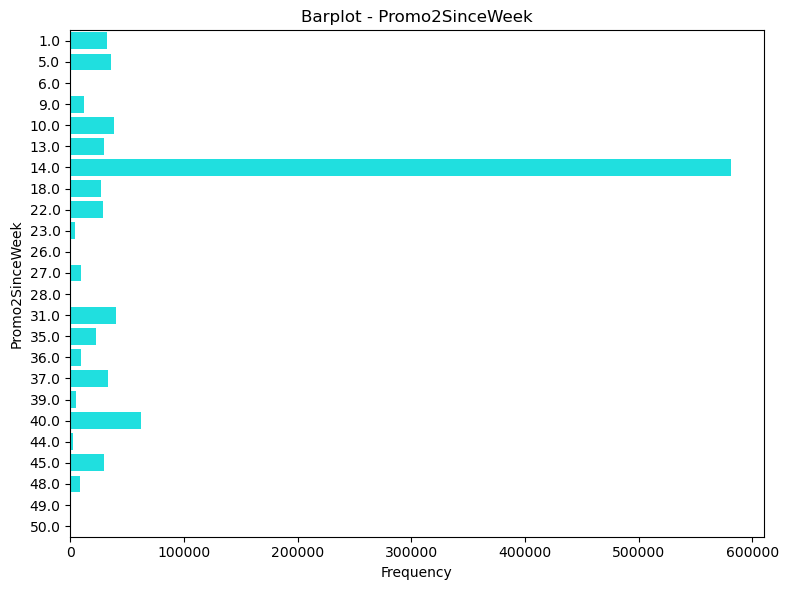

In [19]:
#Barplot for Promo2SinceWeek
plt.figure(figsize=(8, 6))
sns.countplot(y="Promo2SinceWeek", data=data, color="cyan")
plt.title("Barplot - Promo2SinceWeek")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceWeek")
plt.tight_layout()
plt.show()

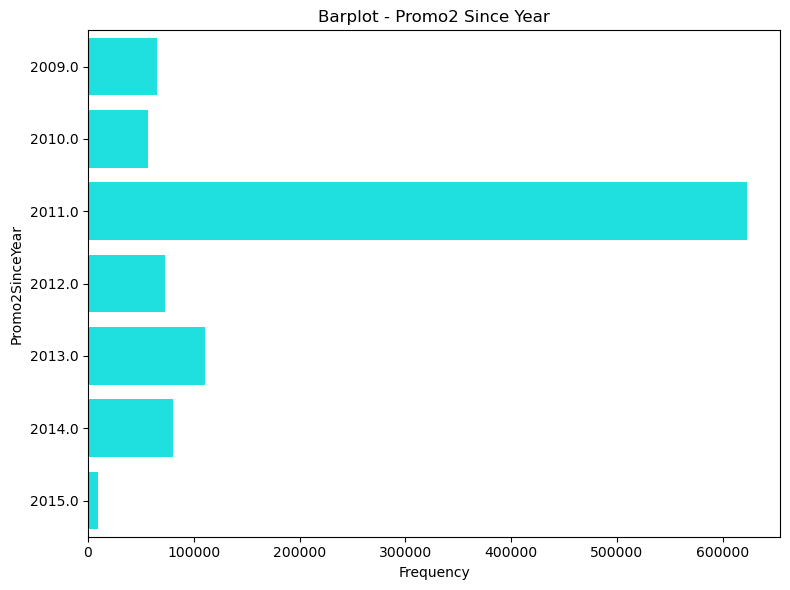

In [22]:
#Barplot for Promo2SinceYear
plt.figure(figsize=(8,6))
sns.countplot(y="Promo2SinceYear", data=data,color="cyan")
plt.title("Barplot - Promo2 Since Year")
plt.xlabel("Frequency")
plt.ylabel("Promo2SinceYear")
plt.tight_layout()
plt.show()

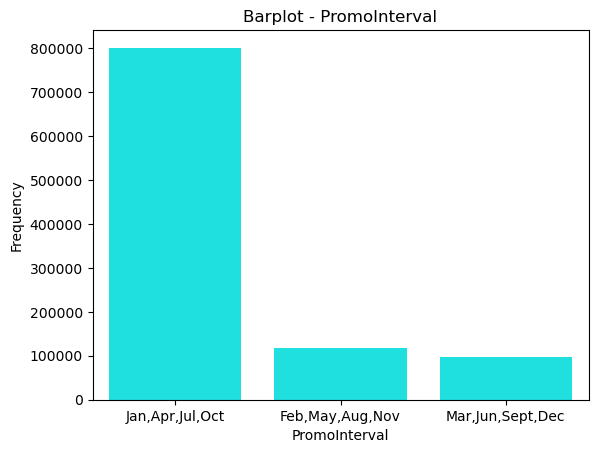

In [23]:
#Barplot for PromoInterval
sns.countplot(x="PromoInterval", data=data,color="cyan")
plt.title("Barplot - PromoInterval")
plt.xlabel("PromoInterval")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Pie Chart-PromoInterval')

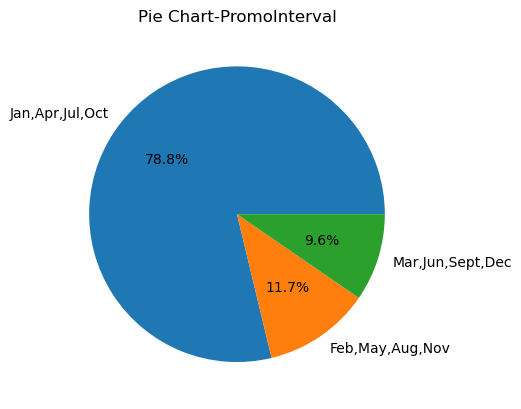

In [24]:
#Pie chart for Promo Interval with percentages
promo_counts=data['PromoInterval'].value_counts()
plt.pie(promo_counts,labels=promo_counts.index,autopct='%1.1f%%')
plt.title("Pie Chart-PromoInterval")

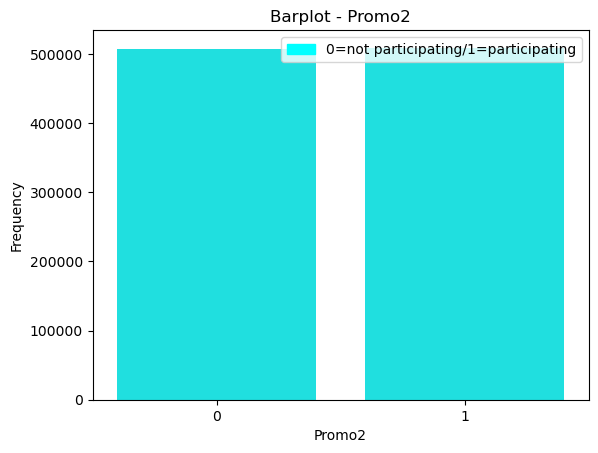

In [39]:
##Barplot for Promo2
sns.countplot(x="Promo2", data=data,color="cyan")
plt.title("Barplot - Promo2")
plt.xlabel("Promo2")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=not participating/1=participating")]
plt.legend(handles=custom_legend, title="")
plt.show()

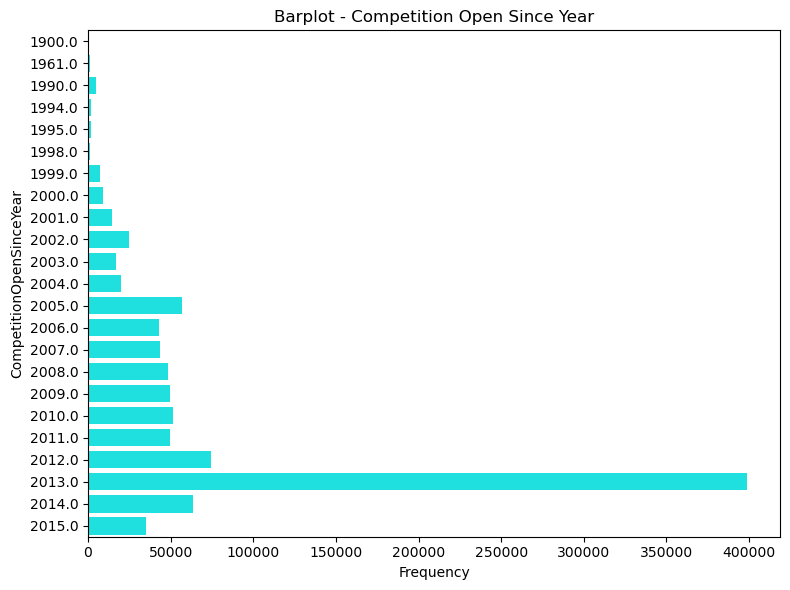

In [25]:
## Horizontal Barplot for CompetitionOpenSinceYear
plt.figure(figsize=(8, 6))
sns.countplot(y="CompetitionOpenSinceYear", data=data, color="cyan")
plt.title("Barplot - Competition Open Since Year")
plt.xlabel("Frequency")
plt.ylabel("CompetitionOpenSinceYear")
plt.tight_layout()
plt.show()

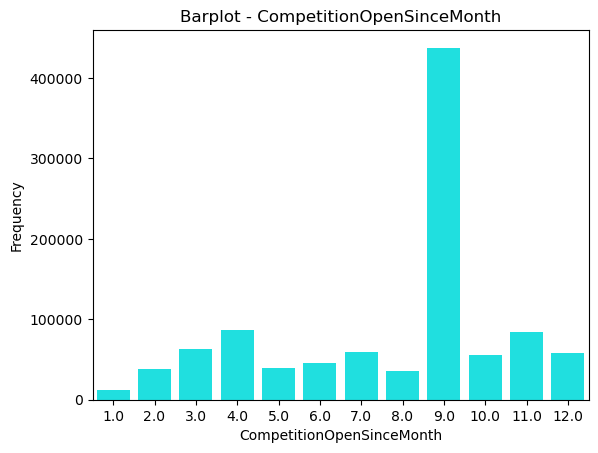

In [26]:
#Barplot for CompetitionOpenSinceMonth
sns.countplot(x="CompetitionOpenSinceMonth", data=data,color="cyan")
plt.title("Barplot - CompetitionOpenSinceMonth")
plt.xlabel("CompetitionOpenSinceMonth")
plt.ylabel("Frequency")
plt.show()

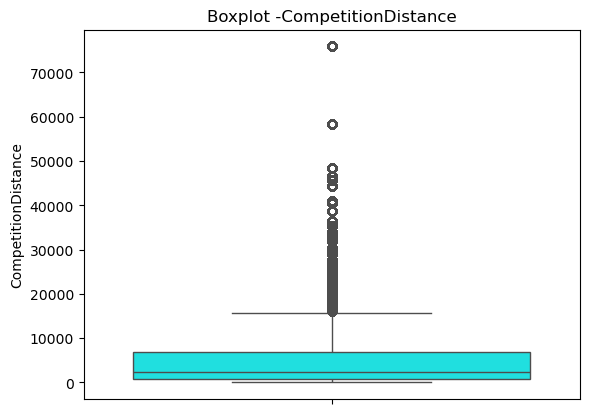

In [42]:
#Boxplot for CompetitionDistance
sns.boxplot(y="CompetitionDistance", data=data, color="cyan")
plt.title("Boxplot -CompetitionDistance")
plt.ylabel("CompetitionDistance")
plt.show()

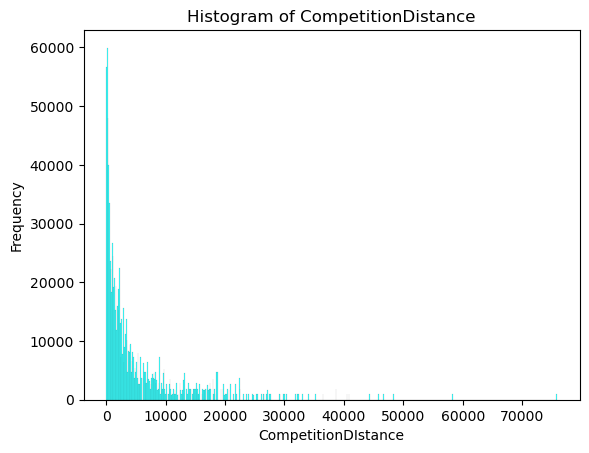

In [43]:
#Histogram of CompetitionDistance
sns.histplot(data=data, x="CompetitionDistance",color="Cyan")
plt.title("Histogram of CompetitionDistance")
plt.xlabel("CompetitionDIstance")
plt.ylabel("Frequency")
plt.show()

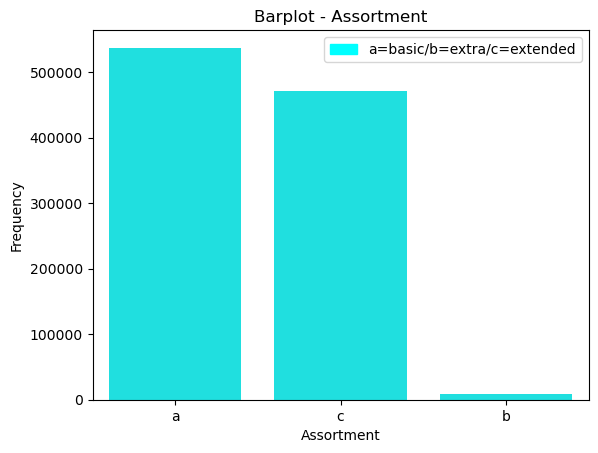

In [52]:
#Barplot for variety of products
sns.countplot(x="Assortment", data=data,color="cyan")
plt.title("Barplot - Assortment")
plt.xlabel("Assortment")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")
plt.show()

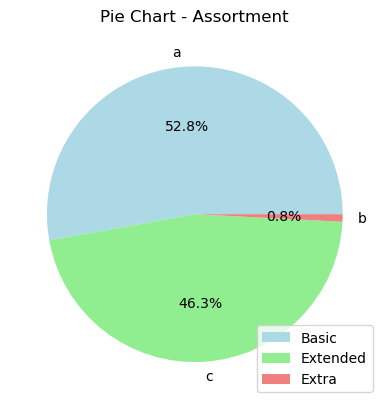

In [ ]:
#Pie chart for variety of products with percentages
a=data['Assortment'].value_counts()
colors=['lightblue','lightgreen','lightcoral']
plt.pie(a,labels=a.index,colors=colors,autopct='%1.1f%%')
plt.title("Pie Chart - Assortment")
plt.legend(["Basic","Extended","Extra"],loc="best")
plt.show()

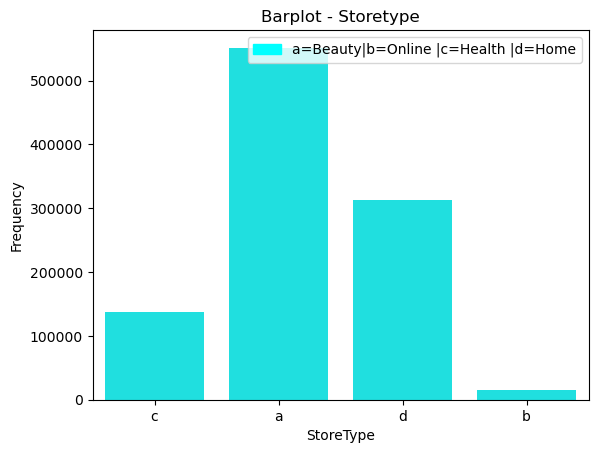

In [65]:
#Barplot for StoreType
sns.countplot(x="StoreType", data=data,color="cyan")
plt.title("Barplot - Storetype")
plt.xlabel("StoreType")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Beauty|b=Online |c=Health |d=Home")]
plt.legend(handles=custom_legend, title="")
plt.show()

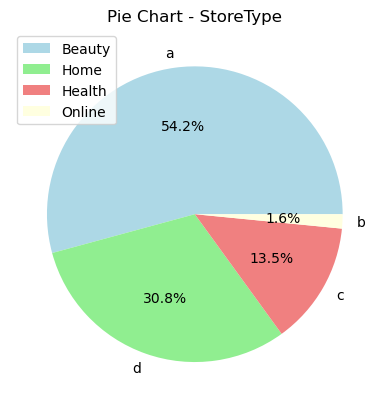

In [66]:
#Pie chart for storetype with percentages
st=data['StoreType'].value_counts()
colors=['lightblue','lightgreen','lightcoral',"lightyellow"]
plt.pie(st,labels=st.index,colors=colors,autopct='%1.1f%%')
plt.title("Pie Chart - StoreType")
plt.legend(["Beauty","Home","Health","Online"],loc="best")
plt.show()

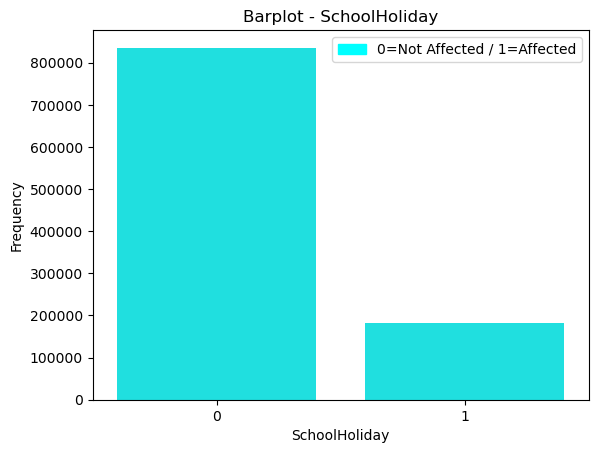

In [54]:
#Barplot with frequencies for SchoolHoliday
sns.countplot(x="SchoolHoliday", data=data,color="cyan")
plt.title("Barplot - SchoolHoliday")
plt.xlabel("SchoolHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=Not Affected / 1=Affected")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for StateHoliday
sns.countplot(x="StateHoliday", data=data,color="cyan")
plt.title("Barplot - StateHoliday")
plt.xlabel("StateHoliday")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
##Barplot for Promo
sns.countplot(x="Promo", data=data, color="cyan")
plt.title("Barplot - Promo")
plt.xlabel("Promo")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = No Promo / 1 = Promo")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for open and closed stores
sns.countplot(x="Open", data=data, color="cyan")
plt.title("Barplot - Open")
plt.xlabel("Open")
plt.ylabel("Frequency")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0 = Closed / 1 = Open")]
plt.legend(handles=custom_legend, title="")
plt.show()

In [ ]:
#Barplot for Dayofweek
sns.countplot(x="DayOfWeek", data=data, color="cyan")
plt.title("Barplot - DayOfWeek")
plt.xlabel("Day Of Week")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Histogram for sales
#Some stores were temporarily closed for refurbishment!
sns.histplot(data=data, x="Sales",color="Cyan")
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

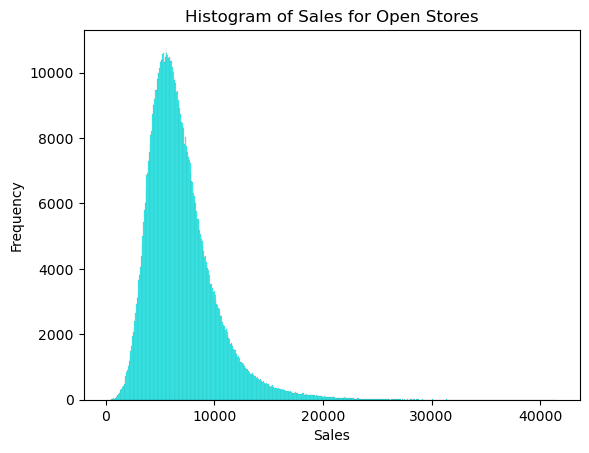

In [50]:
#Histogram of sales for open stores
os = data[data['Open'] == 1]
sns.histplot(data=os, x="Sales", color="cyan")
plt.title("Histogram of Sales for Open Stores")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot of sales
sns.boxplot(y="Sales", data=data, color="cyan")
plt.title("Boxplot of Sales")
plt.ylabel("Sales")
plt.show()

In [ ]:
#Histogram of customers
sns.histplot(data=data, x="Customers",color="Cyan")
plt.title("Histogram of Customers")
plt.xlabel("Customers")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Boxplot of customers
sns.boxplot(y="Customers", data=data, color="cyan")
plt.title("Boxplot of Customers")
plt.ylabel("Customers")
plt.show()

# Correlation between variables

In [15]:
#Libraries
from scipy.stats import kstest
import statsmodels.formula.api as smf
import numpy as np

In [13]:
#Sales~Customers
print(data["Sales"].corr(data["Customers"], method='pearson'),
data["Sales"].corr(data["Customers"], method='spearman'),
data["Sales"].corr(data["Customers"], method='kendall'))

0.8946977306504313 0.9033304972203227 0.7463438699359183


Text(0, 0.5, 'Customers')

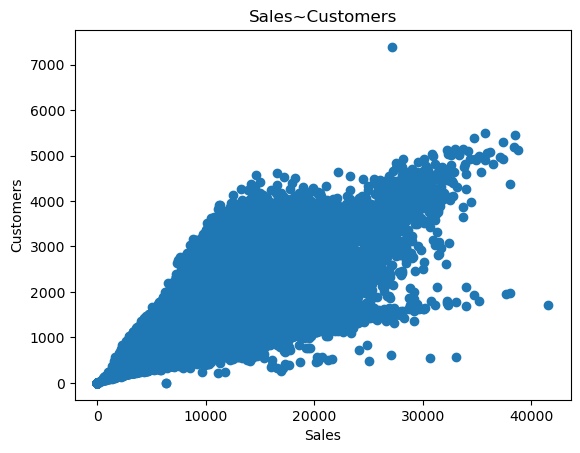

In [29]:
#Plot between Sales~Customers
plt.scatter(data["Sales"], data["Customers"])
plt.title("Sales~Customers")
plt.xlabel("Sales")
plt.ylabel("Customers")

### Assumptions:
### Normality of residuals
### Homoscedasticity 
### Linearity
### Outliers
### Independence

### If model assumptions are not met then we use Kendall & Spearman methods for correlation

In [16]:
#library
import statsmodels.formula.api as smf
#model sales~customers
model1=smf.ols("Sales~Customers",data=data).fit()
print(model1.summary())

#Jarque-Bera normality test (n>2000) indicates that residulas are not normally distributed 
#We have many outliers in Sales & Customers 
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 4.081e+06
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:            -9.0214e+06
No. Observations:             1017209   AIC:                         1.804e+07
Df Residuals:                 1017207   BIC:                         1.804e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1077.9421      2.883    373.916      0.0

In [19]:
#Normality test
residuals=model1.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

Kolmogorov-Smirnov Statistic:0.12592733223319835
P-value:0.0


In [20]:
#Sales~CompetitionDistance
print(data["Sales"].corr(data["CompetitionDistance"], method='pearson'),
data["Sales"].corr(data["CompetitionDistance"], method='spearman'),
data["Sales"].corr(data["CompetitionDistance"], method='kendall'))

-0.018901990568970007 -0.024190048333857895 -0.015721429623566426


Text(0, 0.5, 'CompetitionDistance')

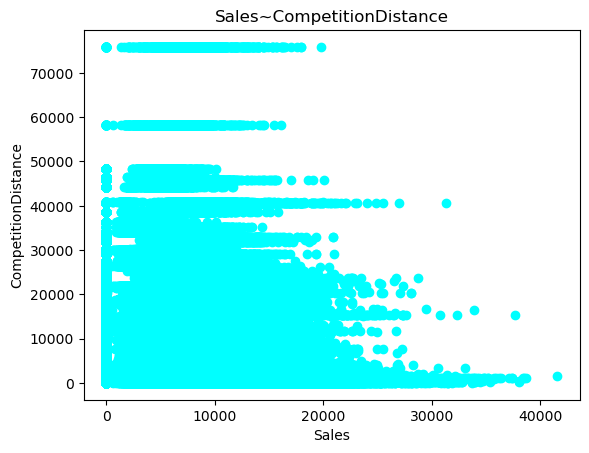

In [23]:
#Plot for Sales~CompetitionDistance
plt.scatter(data["Sales"], data["CompetitionDistance"],color="cyan")
plt.title("Sales~CompetitionDistance")
plt.xlabel("Sales")
plt.ylabel("CompetitionDistance")

In [24]:
#model Sales~CompetitionDistance
model2=smf.ols("Sales~CompetitionDistance",data=data).fit()
print(model2.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Sales & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     363.6
Date:                Mon, 19 May 2025   Prob (F-statistic):           4.87e-81
Time:                        16:41:02   Log-Likelihood:            -9.8410e+06
No. Observations:             1017209   AIC:                         1.968e+07
Df Residuals:                 1017207   BIC:                         1.968e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5825.3507    

In [25]:
#Normality test
residuals=model2.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

Kolmogorov-Smirnov Statistic:0.09289456708497135
P-value:0.0


In [27]:
#Customers~CompetitionDistance
print(data["Customers"].corr(data["CompetitionDistance"], method='pearson'),
data["Customers"].corr(data["CompetitionDistance"], method='spearman'),
data["Customers"].corr(data["CompetitionDistance"], method='kendall'))

-0.10239354680187586 -0.1769468031123368 -0.11922518432675475


Text(0, 0.5, 'CompetitionDistance')

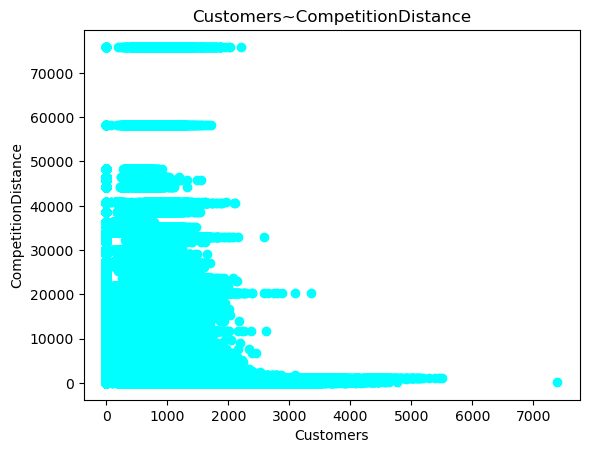

In [28]:
#Plot customers~competitionDistance
plt.scatter(data["Customers"], data["CompetitionDistance"],color="cyan")
plt.title("Customers~CompetitionDistance")
plt.xlabel("Customers")
plt.ylabel("CompetitionDistance")

In [30]:
#model Customers~CompetitionDistance
model3=smf.ols("Customers~CompetitionDistance",data=data).fit()
print(model3.summary())
#Jarque-Bera normality test indicates that residulas are not normally distributed 
#We have many outliers in Customers & CompetitionDistance
#We dont reject H0: Uncorrelated Residuals in Durbin Watson test
#There is no correlation between the 2 variables

                            OLS Regression Results                            
Dep. Variable:              Customers   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        16:50:13   Log-Likelihood:            -7.6844e+06
No. Observations:             1017209   AIC:                         1.537e+07
Df Residuals:                 1017207   BIC:                         1.537e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             666.6337    

In [31]:
#Normality test
residuals=model3.resid
statistic,p_value=kstest(residuals,'norm',args=(np.mean(residuals),np.std(residuals)))
print(f"Kolmogorov-Smirnov Statistic:{statistic}")
print(f"P-value:{p_value}")

Kolmogorov-Smirnov Statistic:0.07836988396258215
P-value:0.0


### Correlation for categorical~categorical
### X^2 test with H0: No relationship vs H1:There is relationship 
### a=5%

In [32]:
#PROMO~SCHOOLHOLIDAY
from scipy import stats
table=pd.crosstab(data['Promo'],data['SchoolHoliday'])
chi_stat, p_value, df, expected = stats.chi2_contingency(table)
print(p_value,chi_stat,expected)

#p-value<a so we reject H0
#School Holidays have impact on whether a promo will take place or not

0.0 4631.935870089784 [[516737.19948604 112391.80051396]
 [318750.80051396  69329.19948604]]


In [33]:
#PROMO~STATEHOLIDAY
#data['Promo'] = data['Promo'].astype(str)
data['StateHoliday'] = data['StateHoliday'].astype(str)
table1 = pd.crosstab(data['Promo'], data['StateHoliday'])
chi_stat,p_val,df,expected_val=stats.chi2_contingency(table1)
print(p_val,chi_stat)

#State Holidays have impact on whether a promo will take place or not

0.0 2948.087398538137


### Non parametric Wilcoxon test for Sales~Promo & Promo2 
### H0:There aren't differences between the mean values VS H1:Not H0


In [74]:
from scipy.stats import mannwhitneyu
#Check if promo and promo 2 have impact on sales

#promo
promo_sales_yes=data[data['Promo']==1]['Sales']  
promo_sales_no=data[data['Promo']==0]['Sales'] 

#promo2
promo2_sales_yes=data[data['Promo2']==1]['Sales']  
promo2_sales_no=data[data['Promo2']==0]['Sales'] 

#Wilcoxon Test
w_stat_promo, p_value_promo = mannwhitneyu(promo_sales_yes, promo_sales_no)
print(w_stat_promo,p_value_promo)
w_stat_promo2,p_value_promo2 = mannwhitneyu(promo2_sales_yes, promo2_sales_no)
print(w_stat_promo2,p_value_promo2)

192939092246.5 0.0
116535552120.5 0.0


## Multivariate Analysis with Plots

In [29]:
import numpy as np
#Date as DataTime 
if not np.issubdtype(data['Date'].dtype,np.datetime64):
    data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')
#Cut Date
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

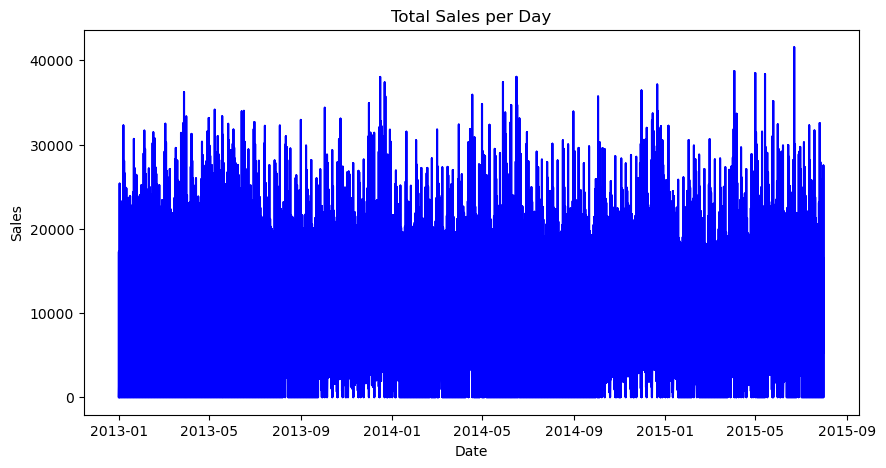

In [ ]:
#Sales ~ Date
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data['Sales'],color='blue')
plt.title("Total Sales per Day")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

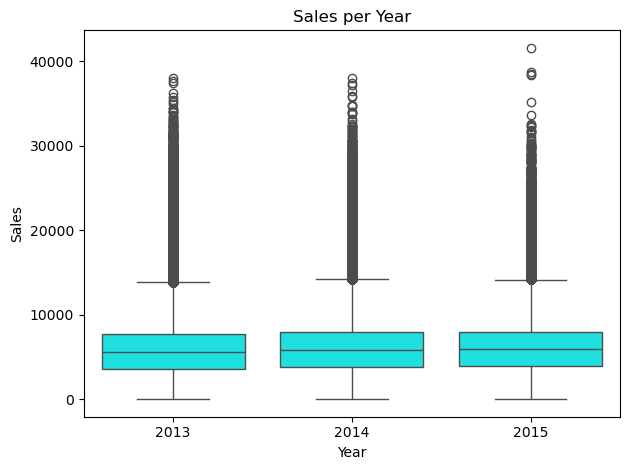

In [65]:
#Boxplot for Sales per Year
sns.boxplot(x='year',y='Sales',data=data,color="cyan")
plt.title('Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Median Sales per year
median_sales_per_year = data.groupby('year')['Sales'].median().reset_index()
print(median_sales_per_year)

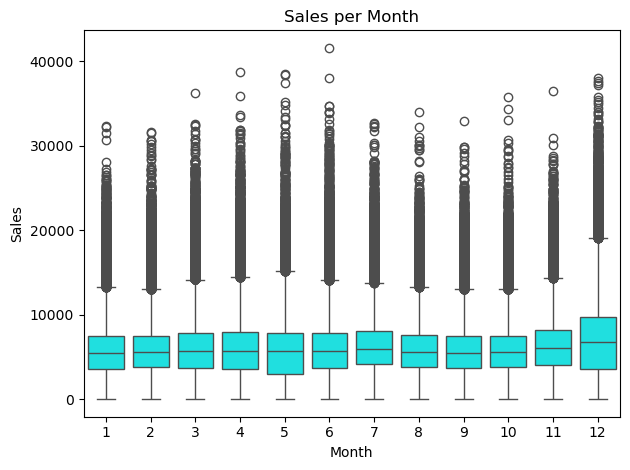

In [83]:
#Boxplot for Sales per month
sns.boxplot(x='month',y='Sales',data=data,color="cyan")
plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Information for Dates with most sales
top_sales=data.sort_values(by='Sales',ascending=False).head(20) 
print(top_sales[['Date', 'Sales', 'Promo', 'StateHoliday','SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek","Store"]])

             Date  Sales Promo StateHoliday SchoolHoliday Promo2 StoreType  \
44393  2015-06-22  41551     0            0             0      1         a   
132946 2015-04-03  38722     1            b             0      0         b   
101726 2015-05-01  38484     1            a             0      0         b   
87231  2015-05-14  38367     0            a             1      0         b   
424086 2014-06-16  38037     1            0             0      0         d   
627776 2013-12-16  38025     1            0             0      0         a   
627220 2013-12-16  37646     1            0             0      1         d   
444361 2014-05-29  37403     0            a             0      0         b   
620531 2013-12-22  37376     0            0             0      0         b   
245945 2014-12-21  37122     0            0             0      0         b   

       Assortment DayOfWeek  Store  
44393           c         1    909  
132946          a         5    262  
101726          a         5   

In [89]:
#Tables with frequencies for big sales
print(top_sales['Promo'].value_counts())
print(top_sales['StateHoliday'].value_counts())
print(top_sales['SchoolHoliday'].value_counts())
print(top_sales['Promo2'].value_counts())
print(top_sales['StoreType'].value_counts())
print(top_sales['Assortment'].value_counts())
print(top_sales['DayOfWeek'].value_counts())
print(top_sales['Store'].value_counts())

Promo
0    5
1    5
Name: count, dtype: int64
StateHoliday
0    6
a    3
b    1
Name: count, dtype: int64
SchoolHoliday
0    9
1    1
Name: count, dtype: int64
Promo2
0    8
1    2
Name: count, dtype: int64
StoreType
b    6
a    2
d    2
Name: count, dtype: int64
Assortment
a    7
c    3
Name: count, dtype: int64
DayOfWeek
1    4
4    2
5    2
7    2
2    0
3    0
6    0
Name: count, dtype: int64
Store
262    6
909    1
57     1
817    1
261    1
Name: count, dtype: int64


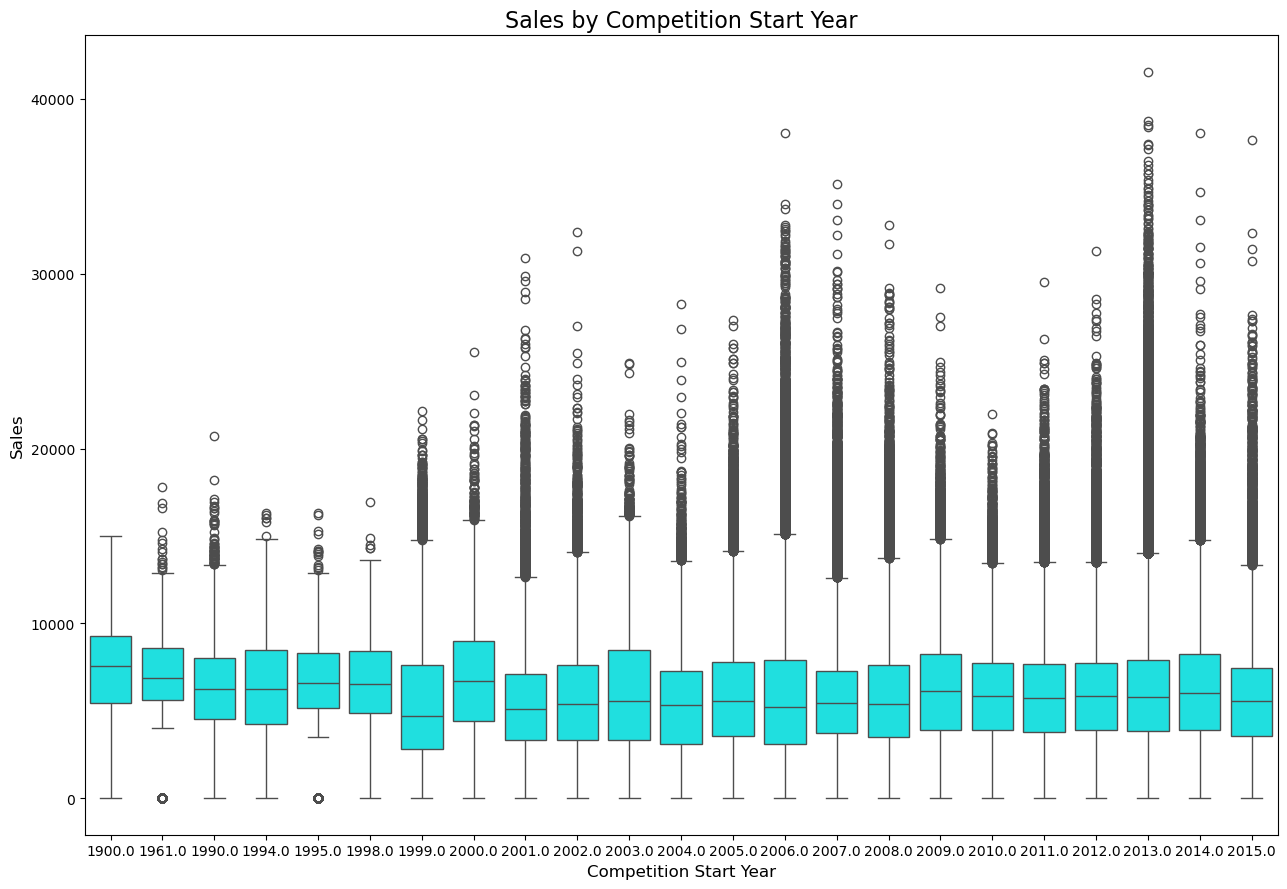

In [32]:
#Boxplot for CompetitionStart Year
plt.figure(figsize=(13,9))
sns.boxplot(data=data, x='CompetitionOpenSinceYear', y='Sales',color="cyan")
plt.title('Sales by Competition Start Year', fontsize=16)
plt.xlabel('Competition Start Year',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

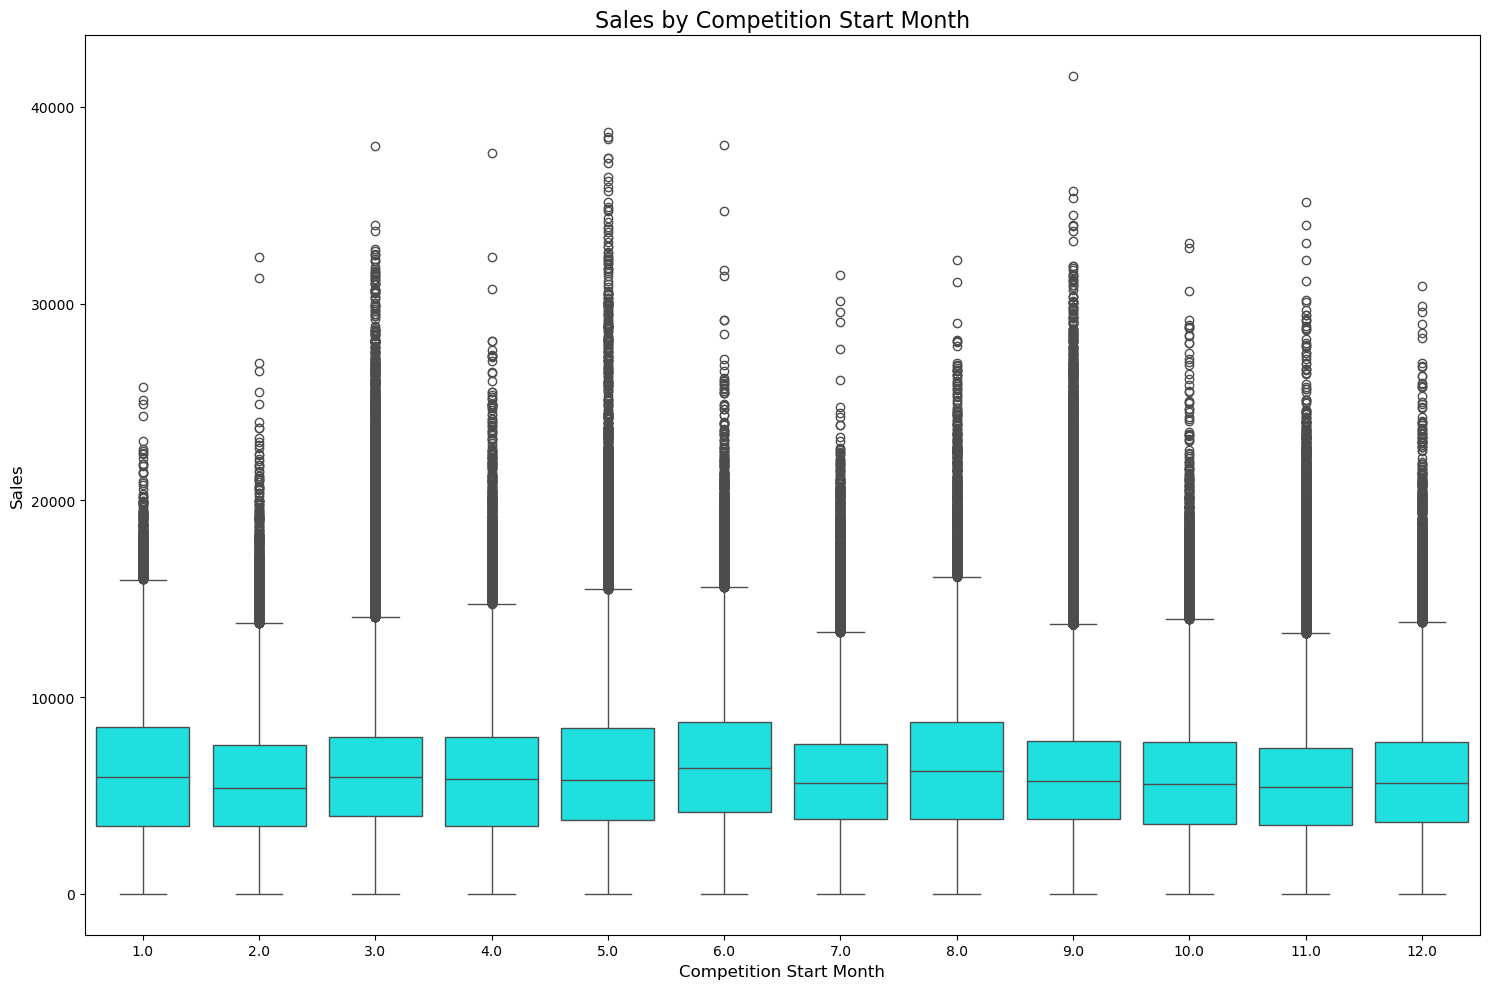

In [93]:
#Boxplot Sales~CompettitionStartMonth
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='CompetitionOpenSinceMonth', y='Sales',color="cyan")
plt.title('Sales by Competition Start Month', fontsize=16)
plt.xlabel('Competition Start Month',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sales based on PromotionInterval')

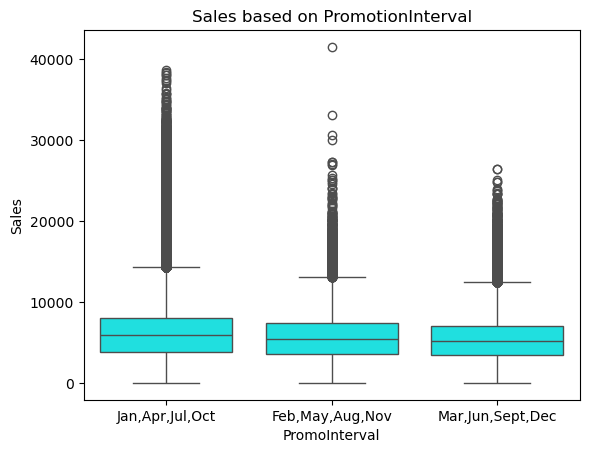

In [33]:
#Boxplot for sales~PromoInterval (Months that promo2 starts)
sns.boxplot(data=data, x='PromoInterval', y='Sales',color="cyan")
plt.title("Sales based on PromotionInterval")

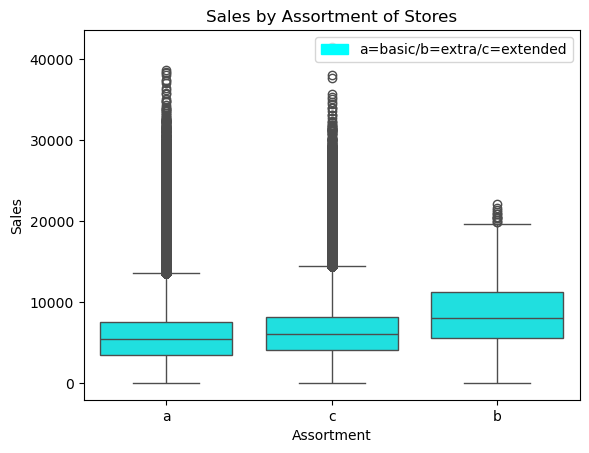

In [34]:
#Sales~Assortment
sns.boxplot(data=data, x='Assortment', y='Sales',color="cyan")
plt.title("Sales by Assortment of Stores")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=basic/b=extra/c=extended")]
plt.legend(handles=custom_legend, title="")

Text(0.5, 1.0, 'Sales by Type of The Store')

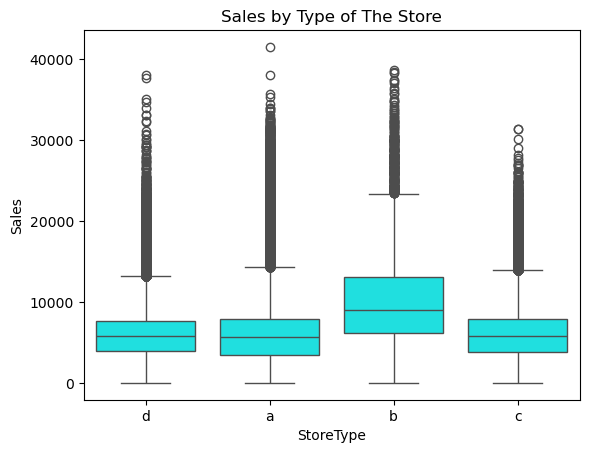

In [95]:
#Sales~StoreType
sns.boxplot(data=data, x='StoreType', y='Sales',color="cyan")
plt.title("Sales by Type of The Store")

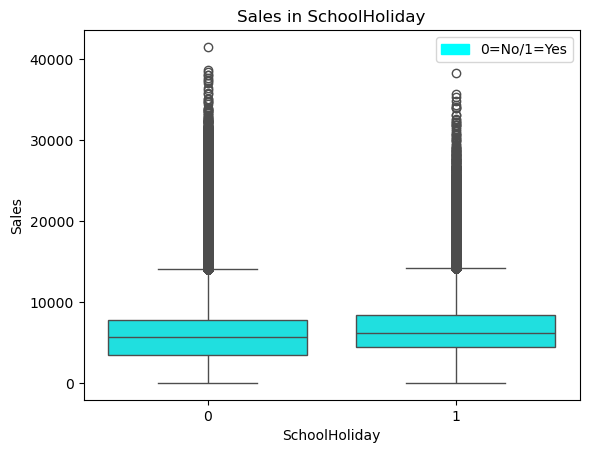

In [96]:
#Sales~SchoolHoliday
sns.boxplot(data=data, x='SchoolHoliday', y='Sales',color="cyan")
plt.title("Sales in SchoolHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="0=No/1=Yes")]
plt.legend(handles=custom_legend, title="")

In [ ]:
#Sales~StateHoliday
sns.boxplot(data=data, x='StateHoliday', y='Sales',color="cyan")
plt.title("Sales in StateHoliday")
from matplotlib.patches import Patch
custom_legend = [Patch(color="cyan", label="a=Public Holiday/ b=Easter/ c=Christmas/0=None")]
plt.legend(handles=custom_legend, title="")

Text(0.5, 1.0, 'Sales per Day')

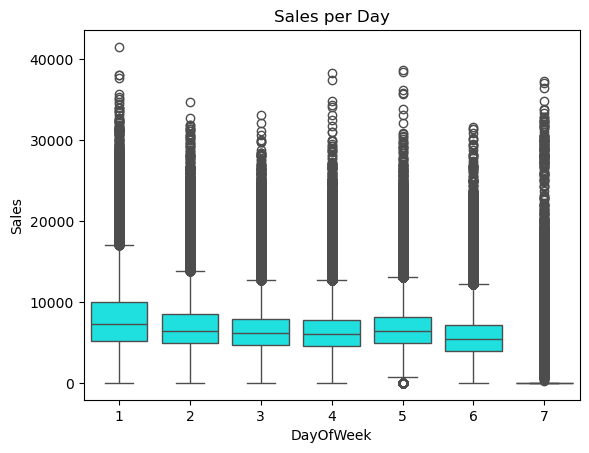

In [97]:
#Daily Sales
sns.boxplot(data=data, x='DayOfWeek', y='Sales',color="cyan")
plt.title("Sales per Day")

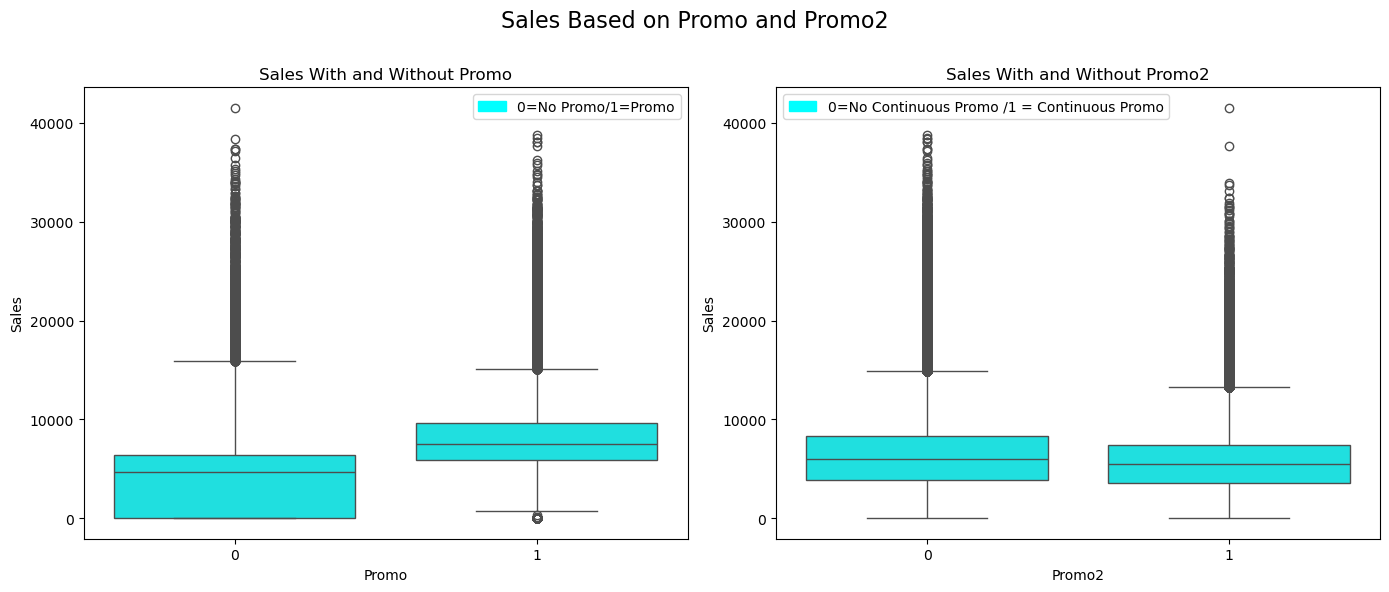

In [98]:
#Sales based on Promo and Promo2
fig,ax=plt.subplots(1, 2,figsize=(14, 6))
sns.boxplot(data=data,x='Promo',y='Sales',color="cyan",ax=ax[0])
ax[0].set_title("Sales With and Without Promo")
custom_legend_1=[Patch(color="cyan",label="0=No Promo/1=Promo")]
ax[0].legend(handles=custom_legend_1, title="")

sns.boxplot(data=data,x='Promo2',y='Sales',color="cyan",ax=ax[1])
ax[1].set_title("Sales With and Without Promo2")
custom_legend_2=[Patch(color="cyan",label="0=No Continuous Promo /1 = Continuous Promo")]
ax[1].legend(handles=custom_legend_2, title="")

plt.suptitle("Sales Based on Promo and Promo2", fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

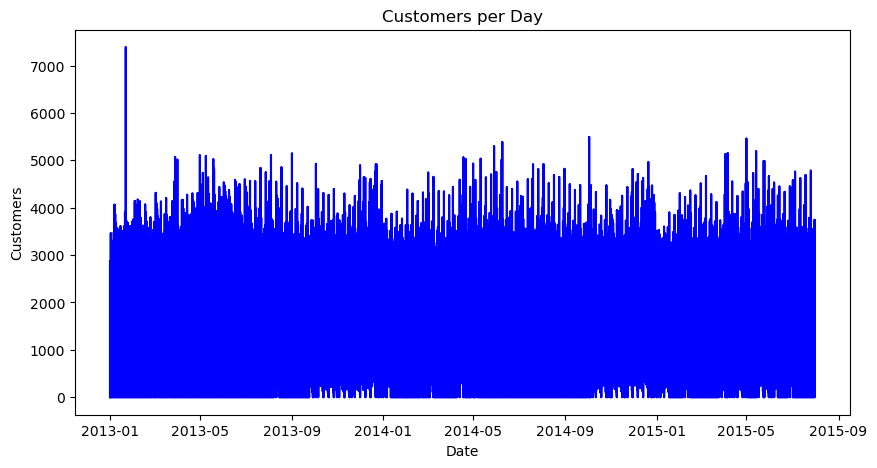

In [103]:
#Customers ~ Date
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data['Customers'],color='blue')
plt.title("Customers per Day")
plt.xlabel("Date")
plt.ylabel("Customers")
plt.show()

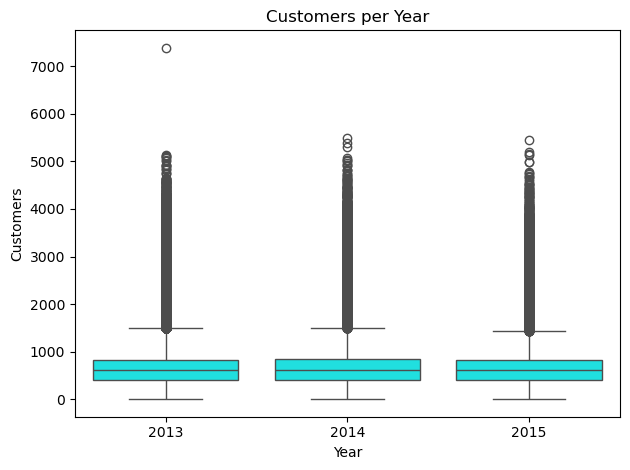

In [99]:
#Boxplot for customers~year
sns.boxplot(x='year',y='Customers',data=data,color="cyan")
plt.title('Customers per Year')
plt.xlabel('Year')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

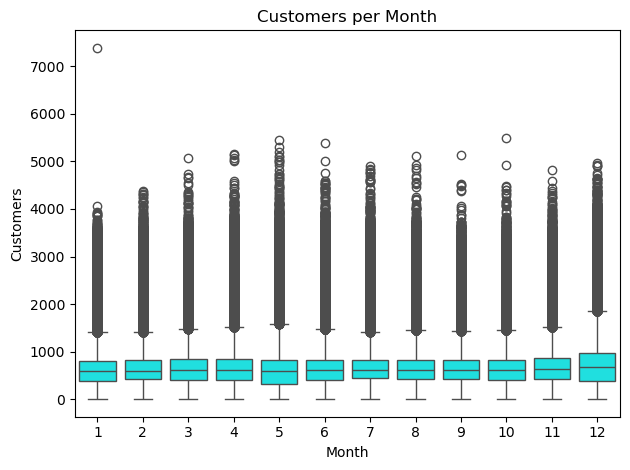

In [100]:
#Customers per month
sns.boxplot(x='month',y='Customers',data=data,color="cyan")
plt.title('Customers per Month')
plt.xlabel('Month')
plt.ylabel('Customers')
plt.tight_layout()

In [108]:
# Dates with most customers
top_customers=data.sort_values(by='Customers',ascending=False).head(5) 
print(top_customers[['Date', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',"Promo2","StoreType","Assortment","DayOfWeek","Store"]])

             Date  Customers Promo StateHoliday SchoolHoliday Promo2  \
993496 2013-01-22       7388     1            0             0      0   
319810 2014-10-03       5494     1            a             0      0   
101726 2015-05-01       5458     1            a             0      0   
432096 2014-06-09       5387     0            a             0      0   
444361 2014-05-29       5297     0            a             0      0   

       StoreType Assortment DayOfWeek  Store  
993496         a          a         2    817  
319810         b          a         5    262  
101726         b          a         5    262  
432096         b          a         1    262  
444361         b          a         4    262  


In [105]:
#Tables with frequencies for many customers
print(top_customers['Promo'].value_counts())
print(top_customers['StateHoliday'].value_counts())
print(top_customers['SchoolHoliday'].value_counts())
print(top_customers['Promo2'].value_counts())
print(top_customers['StoreType'].value_counts())
print(top_customers['Assortment'].value_counts())

Promo
0    6
1    4
Name: count, dtype: int64
StateHoliday
a    5
0    3
b    2
Name: count, dtype: int64
SchoolHoliday
0    9
1    1
Name: count, dtype: int64
Promo2
0    10
1     0
Name: count, dtype: int64
StoreType
b    9
a    1
Name: count, dtype: int64
Assortment
a    10
Name: count, dtype: int64


Text(0.5, 1.0, 'Customers per Day')

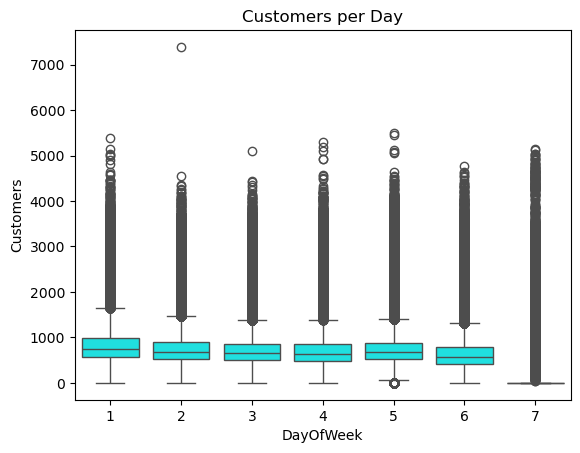

In [102]:
#Customers per day
sns.boxplot(data=data, x='DayOfWeek', y='Customers',color="cyan")
plt.title("Customers per Day")

## Multivariate Analysis with Plots for 3 Variables

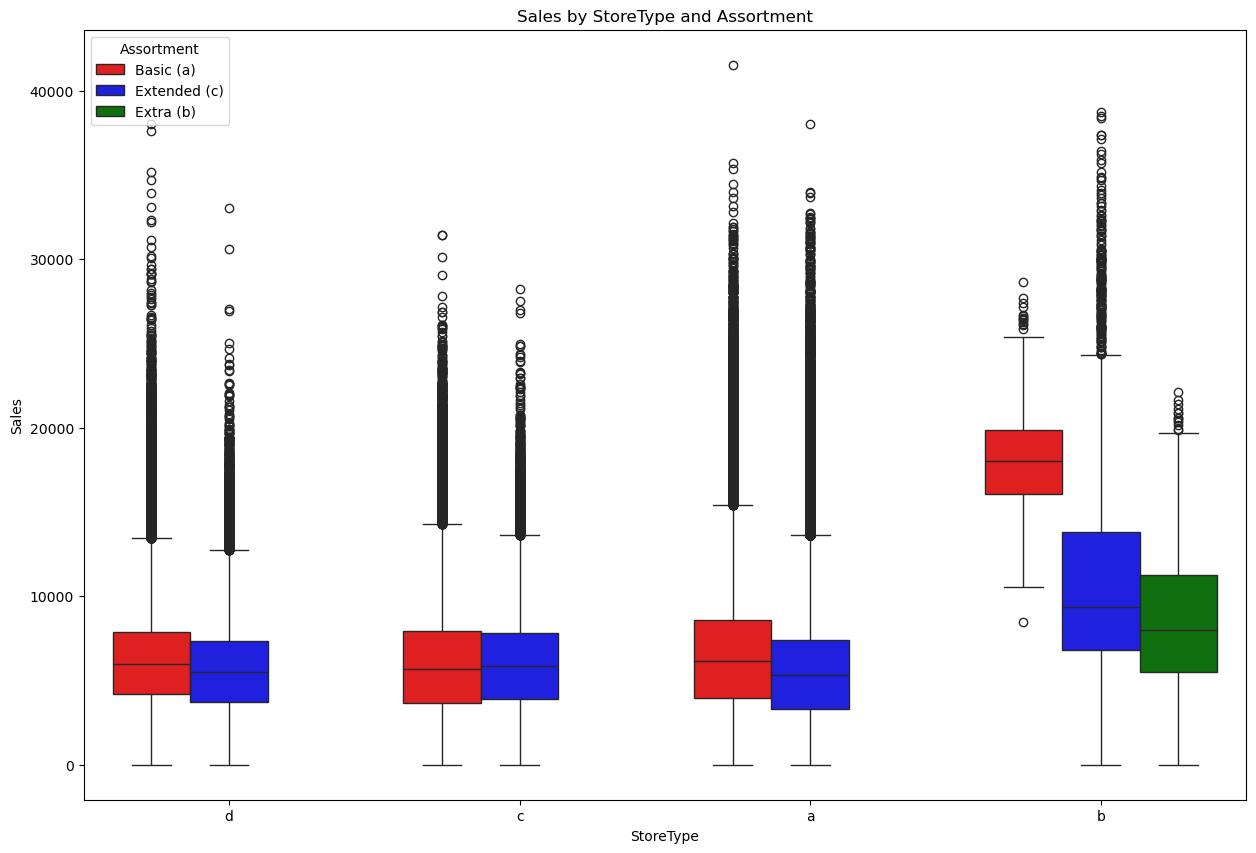

In [109]:
#Boxplot for sales per storetype and assortment
plt.figure(figsize=(15, 10))
sns.boxplot(x='StoreType', y='Sales', hue='Assortment', data=data, 
            palette={'a': 'blue', 'b': 'green', 'c': 'red'})
plt.title('Sales by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Sales')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, 
           labels=['Basic (a)',  'Extended (c)','Extra (b)'], 
           title='Assortment')
plt.show()

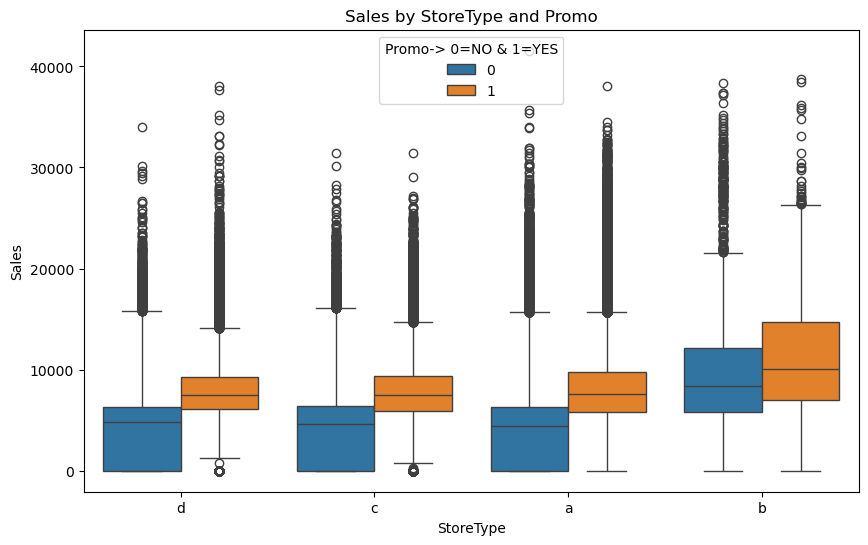

In [110]:
#Boxplot for sales per storetype and Promo
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo',data=data)
plt.title('Sales by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo-> 0=NO & 1=YES')

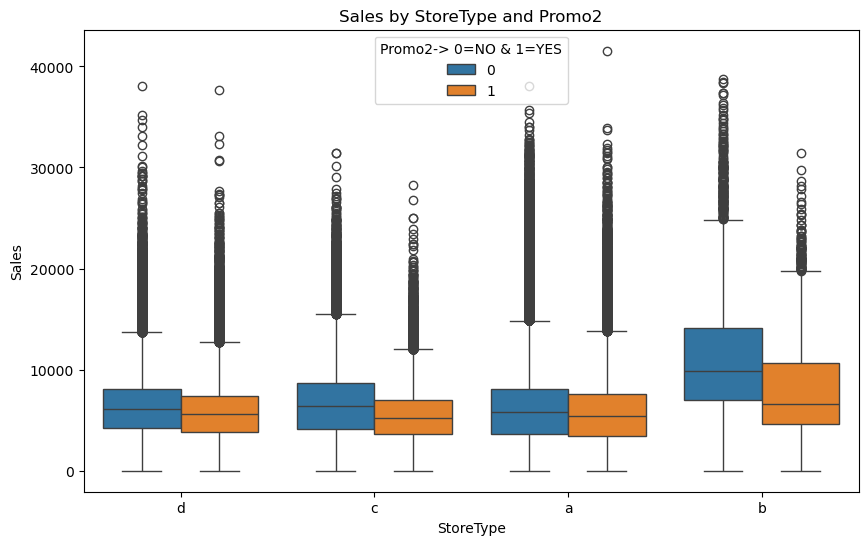

In [111]:
#Boxplot for sales per storetype and promo2
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales',hue='Promo2',data=data)
plt.title('Sales by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='Promo2-> 0=NO & 1=YES')

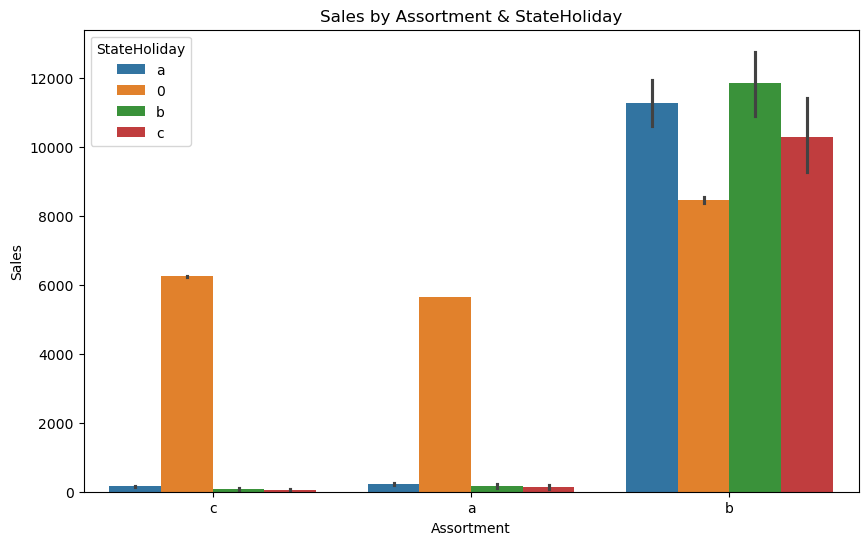

In [116]:
##Boxplot for sales by assortment and stateholiday
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by Assortment & StateHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='StateHoliday')

In [ ]:
#Sales~Assortment & SchoolHoliday
plt.figure(figsize=(10,6))
sns.barplot(x='Assortment', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by Assortment & SchoolHoliday')
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday-> 0=No & 1=YES')

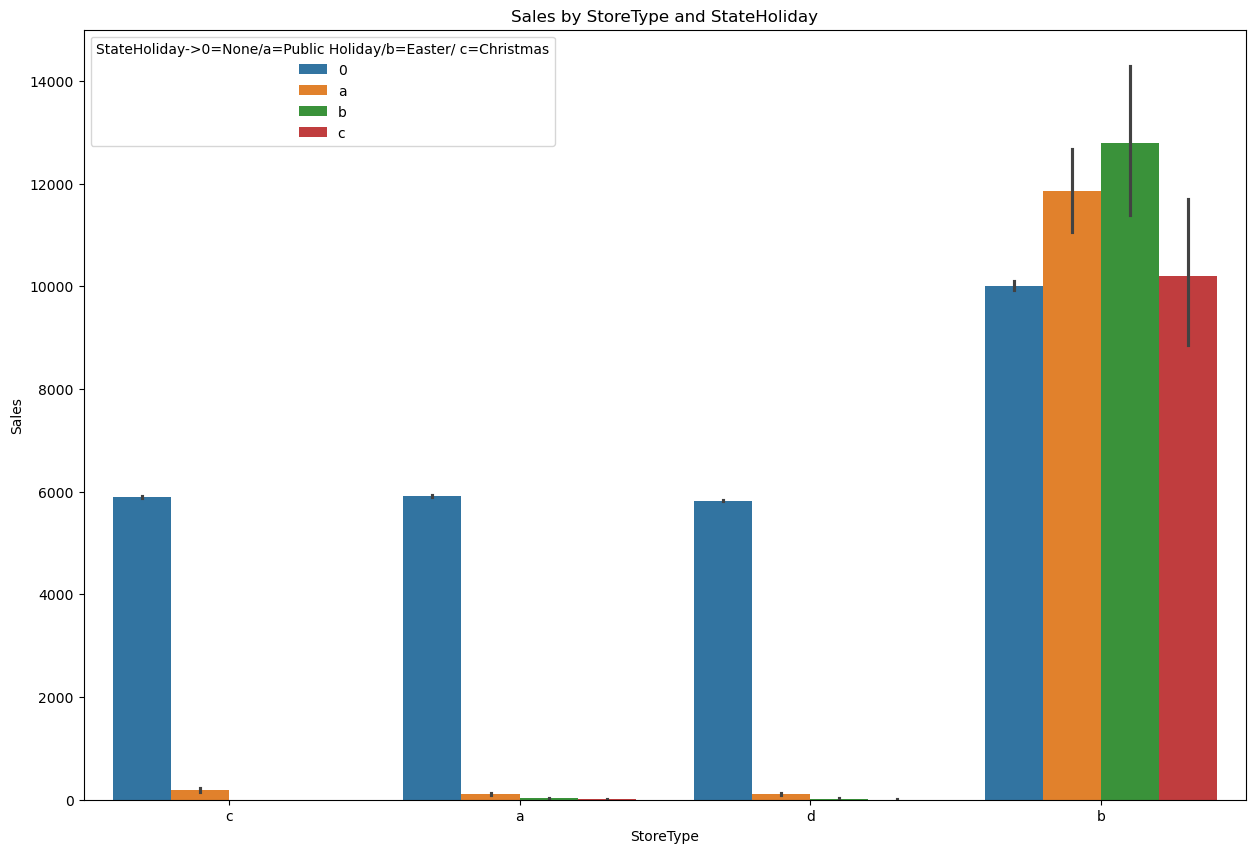

In [42]:
#Sales~Storetype and stateholiday
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Sales',hue='StateHoliday',data=data)
plt.title('Sales by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='StateHoliday->0=None/a=Public Holiday/b=Easter/ c=Christmas')

In [ ]:
#Sales~Storetype and schoolholiday
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Sales',hue='SchoolHoliday',data=data)
plt.title('Sales by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.legend(title='SchoolHoliday')

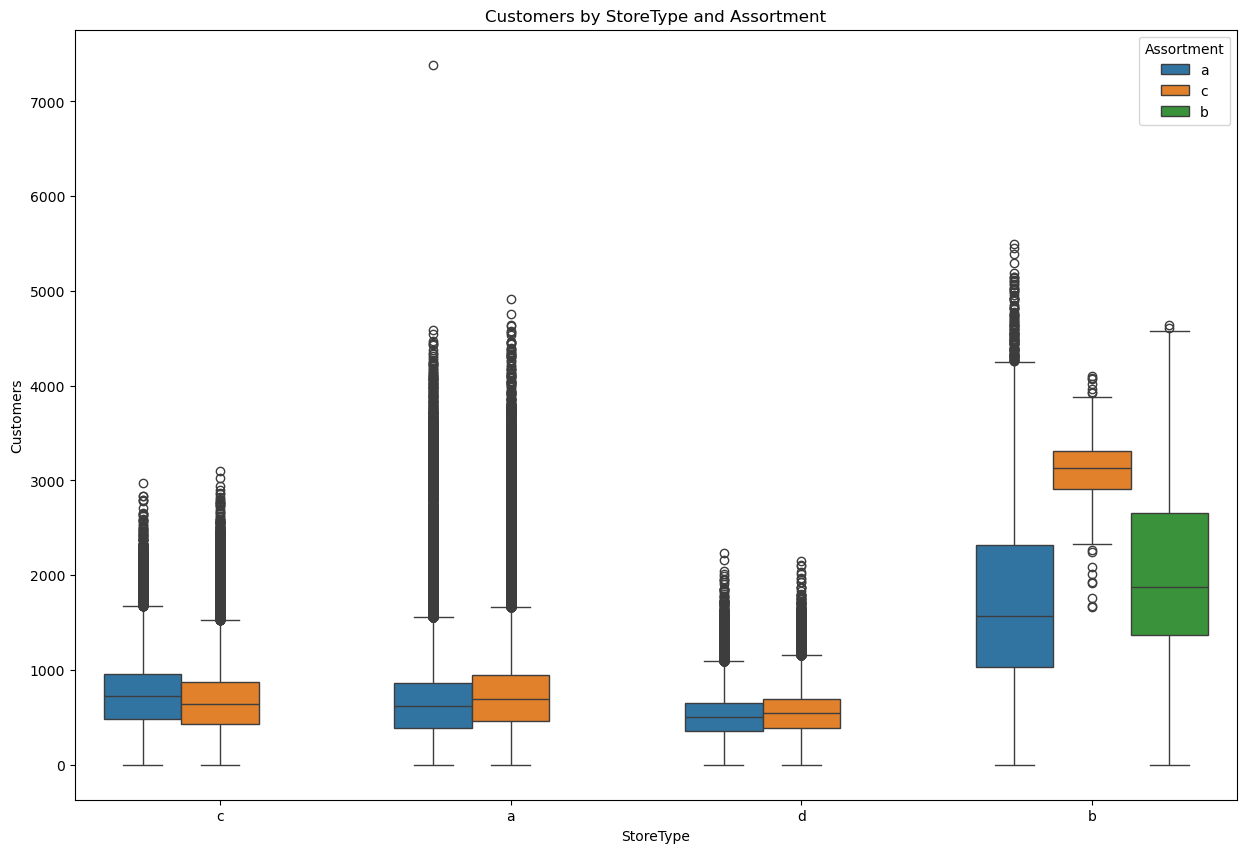

In [43]:
#Customers~Storetype and assortment
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Assortment',data=data)
plt.title('Customers by StoreType and Assortment')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Assortment')

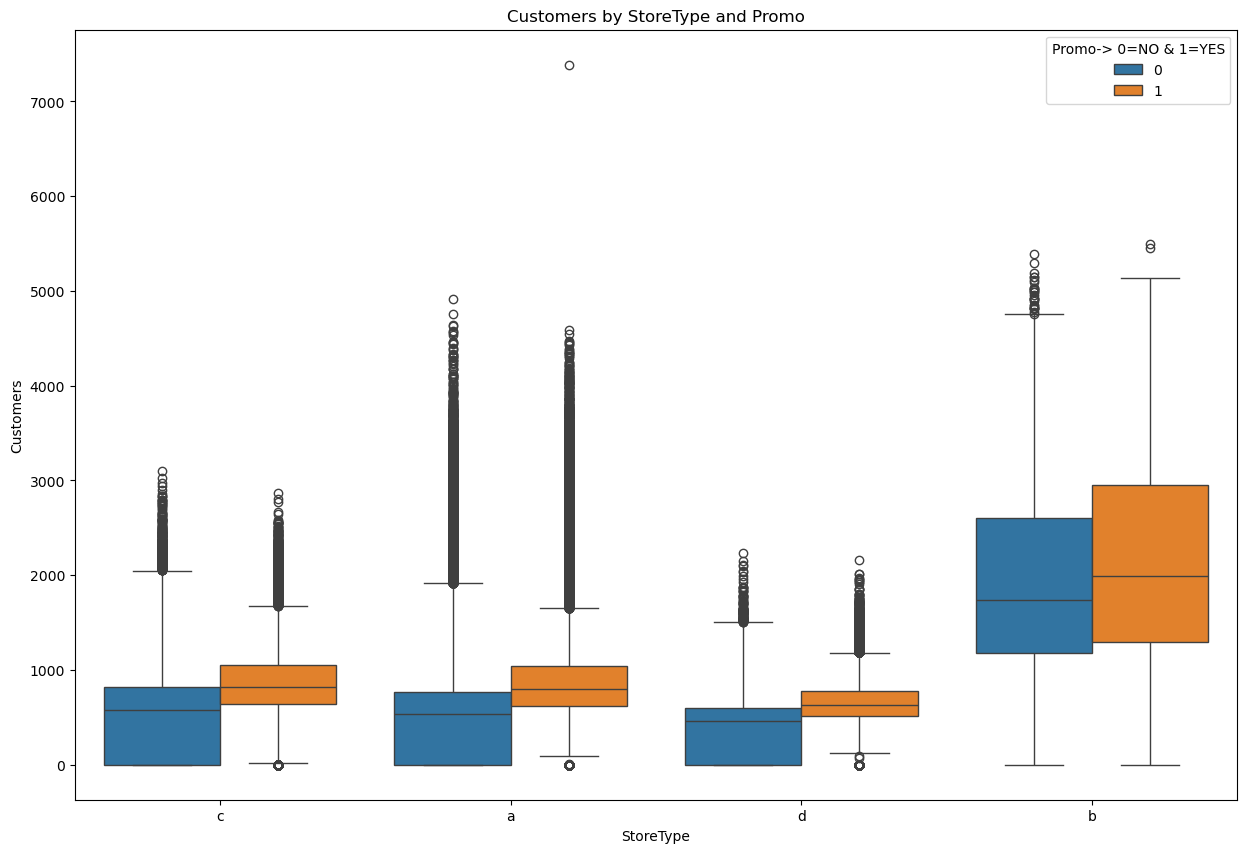

In [44]:
#Customers~Storetype and promo
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo',data=data)
plt.title('Customers by StoreType and Promo')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo-> 0=NO & 1=YES')

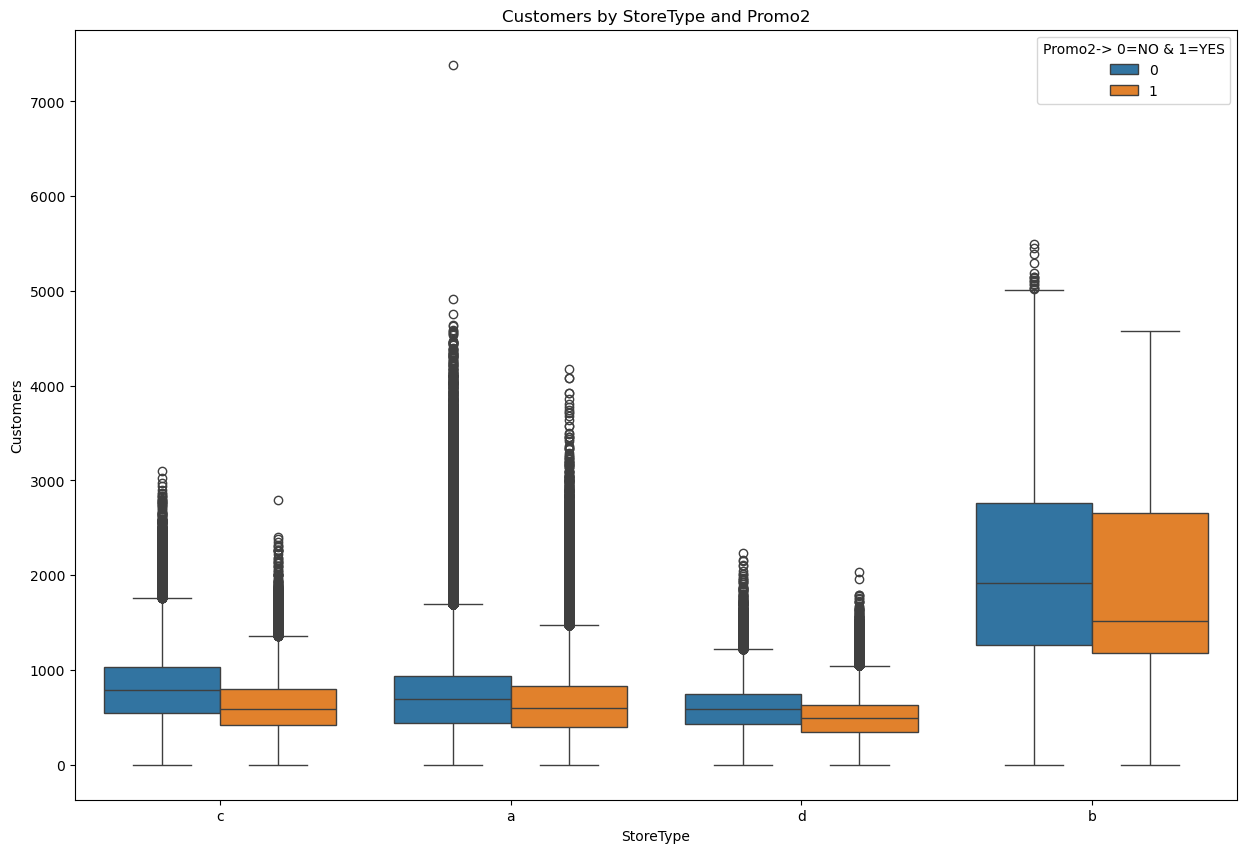

In [45]:
#Customers~Storetype and promo2
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='Promo2',data=data)
plt.title('Customers by StoreType and Promo2')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='Promo2-> 0=NO & 1=YES')

In [ ]:
#Customers~Storetype and schoolholiday
plt.figure(figsize=(15,10))
sns.boxplot(x='StoreType', y='Customers',hue='SchoolHoliday',data=data)
plt.title('Customers by StoreType and SchoolHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title='SchoolHoliday-> 0=NO & 1=YES')

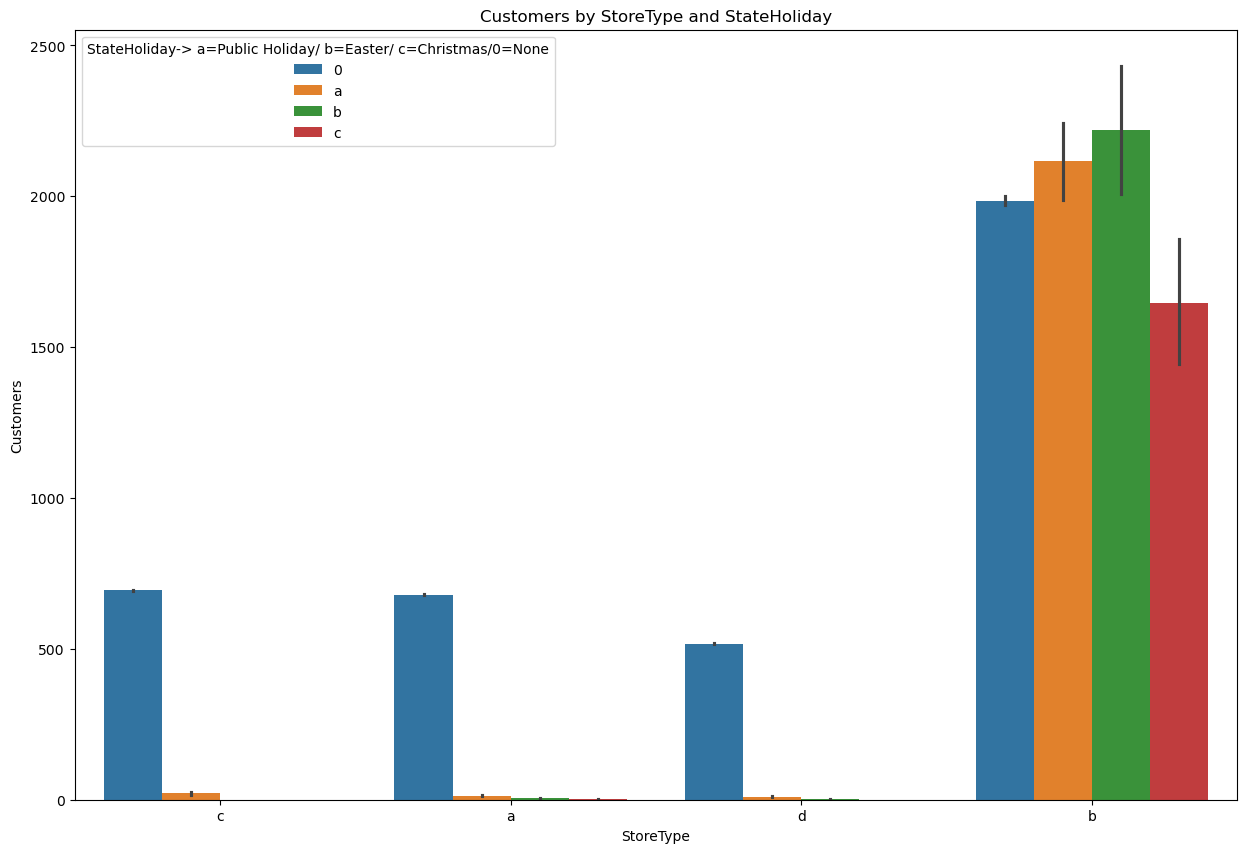

In [46]:
##Customers~Storetype and stateholiday
plt.figure(figsize=(15,10))
sns.barplot(x='StoreType', y='Customers',hue='StateHoliday',data=data)
plt.title('Customers by StoreType and StateHoliday')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.legend(title="StateHoliday-> a=Public Holiday/ b=Easter/ c=Christmas/0=None")

## Feature Engineering 
### PromotionFlags (Promo & Promo2) & HolidayIndicators (SchoolHoliday & StateHoliday)

In [69]:
#PromotionFlags
data['PromotionFlags']=((data['Promo']==1)|(data['Promo2']==1)).astype(int)
data["PromotionFlags"].value_counts() #check

PromotionFlags
1    703242
0    313967
Name: count, dtype: int64

In [70]:
# StateHoliday as a binary variable
data['StateHolidayIndicators']=data['StateHoliday'].apply(lambda x: 1 if str(x).strip() in ['a','b','c'] else 0).astype(int)
data['HolidayIndicators']=((data['StateHolidayIndicators']==1)|(data['SchoolHoliday']==1)).astype(int)
data["HolidayIndicators"].value_counts() #Check

HolidayIndicators
0    819949
1    197260
Name: count, dtype: int64

In [ ]:
#Boxplot for sales~PromotionFlags
sns.boxplot(x=data["PromotionFlags"],y="Sales",data=data)
plt.title('Sales with Promotion or not')
plt.legend(title="0=No promo / 1= Promo")

In [ ]:
#Sales For sales ~HolidayIndicators
sns.boxplot(y="Sales",x="HolidayIndicators",data=data)
plt.title('Sales in Holidays or not')
plt.legend(title="0=No Holidays/ 1= Holidays")

In [73]:
#Promo during Holiday
holiday_with_promo=data[(data['HolidayIndicators']==1)&(data['PromotionFlags']==1)].shape[0]
total_holidays=data[data['HolidayIndicators']==1].shape[0]
percentage_promo_during_holiday=((holiday_with_promo/total_holidays)*100) 

#Promo without holiday
non_holiday_with_promo=data[(data['HolidayIndicators']==0) &(data['PromotionFlags']==1)].shape[0]
total_non_holidays=data[data['HolidayIndicators']==0].shape[0]
percentage_promo_during_non_holiday=((non_holiday_with_promo/total_non_holidays) * 100) 

#results
print(f"Promo during Holiday:{percentage_promo_during_holiday:.2f}%")
print(f"Promo without Holiday:{percentage_promo_during_non_holiday:.2f}%")

Promo during Holiday:72.40%
Promo without Holiday:68.35%


# Time Series & Machine Learning Models

## Time Series -> ARIMA & Prophet

In [75]:
#Time Series 
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from prophet import Prophet
from pmdarima import auto_arima ,ARIMA, model_selection
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [76]:
#split the dataset in test & train
split_date = '2015-07-01'
train_data=data[data['Date']<split_date].copy()
test_data =data[data['Date']>=split_date].copy()

In [ ]:
#check
print(train_data["Date"])
print(test_data["Date"])
train_data['Sales']=train_data['Sales'].astype(float)

In [78]:
#Rename Sales as y
data["Sales"]=data["Sales"].astype(float)
data=data.rename(columns={"Sales":"y"})

train_data["Sales"]=train_data["Sales"].astype(float)
train_data=train_data.rename(columns={"Sales":"y"})

test_data["Sales"]=test_data["Sales"].astype(float)
test_data=test_data.rename(columns={"Sales":"y"})

### Augmented Dickey Fuller Test for time series stationarity
### H0:Non Stationary Time series VS H1:Stationarity
### Non Stationary Time series -> Differencing Method

In [ ]:
#significance level
alpha = 0.05

#Data for every store
stores=data['Store'].drop_duplicates()
df_subsets={store:data[data['Store']==store] for store in stores}

#Dickey Fuller test ->H0:Non Stationary H1:Stationary 
for store, store_data in df_subsets.items():
    sales=store_data['y'] 
    result=adfuller(sales)
    p_value=result[1]
    
    # check
    if p_value > alpha:
        print(f"Store{store}: Non Stationary (p-value = {p_value}) Needs Differencing")
        sales_diff=sales.diff().dropna()  #Differencing method
        print(f"Differencing data for {store}:")
        print(sales_diff.head())
    else:
        print(f"Store {store}: Stationary (p-value = {p_value})")

In [ ]:
#ACF plot for Total sales in order to check seasonality
grouped_sales = data.groupby('Date')['y'].sum()
grouped_sales.index = pd.to_datetime(grouped_sales.index)
grouped_sales.sort_index(inplace=True)

#ACF plot for seasonality check
plot_acf(grouped_sales, lags=30)
plt.title('Autocorrelation of Total Sales')
plt.show()

In [ ]:
#Seasonality Check for train data
##There is seasonality beacause of the continuous pattern and the big spikes
plot_acf(train_data['y'],lags=30)
plt.show()

In [ ]:
#Seasonal decompose for store ID
#Second Method
my_series=data[data["Store"]==12]
result = seasonal_decompose(my_series['y'],period=7)
result.plot()

In [ ]:
#seasonality for a specific store
store_id = 165
store_data = train_data[train_data["Store"] == store_id].copy()
store_data["Date"] = pd.to_datetime(store_data["Date"])
store_data.set_index("Date", inplace=True)
store_data.sort_index(inplace=True)
plot_acf(store_data['y'], lags=30)
plt.show()

## ARIMA models for sales forecasting in StoreTypes A,B,C & D

In [82]:
n_periods=len(test)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=28775.966, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=28660.898, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=28626.610, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=30181.247, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=28777.952, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=28613.467, Time=0.40 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=28700.028, Time=0.26 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=28409.277, Time=0.98 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=28651.593, Time=0.59 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=28399.467, Time=1.40 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=28442.102, Time=0.95 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=28406.154, Time=1.62 sec
 ARIMA(1,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,0,2)(2,0,2)[7] interce

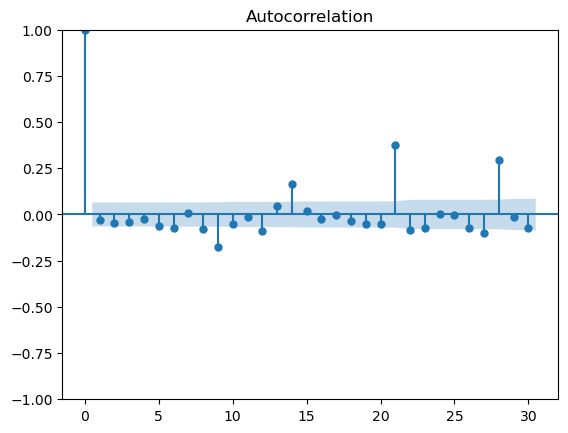

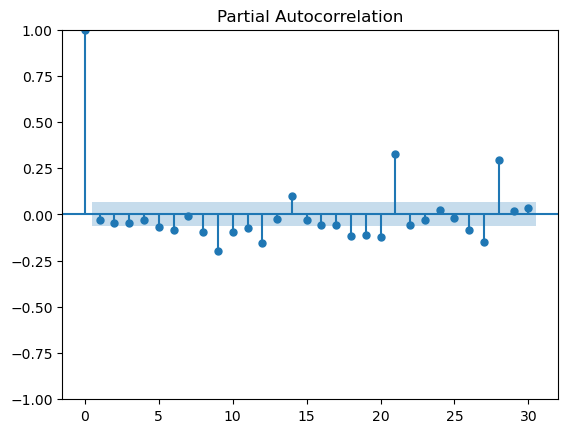

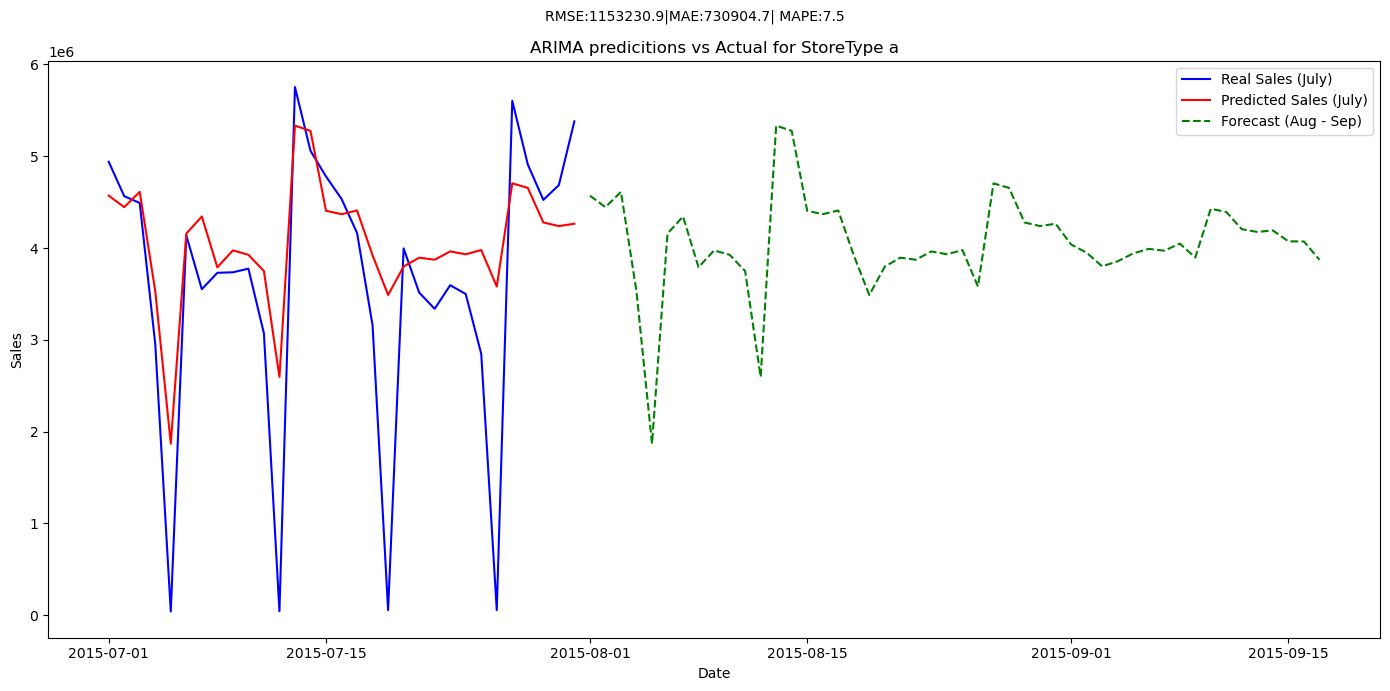

In [83]:
#ARIMA model for Store Types
#StoreType -> A
store_type='a'

#split data in test & train for storetype A
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_a=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_a.fit(train)
print(model_a.summary())

#Predicitions 
n_periods=len(test)
forecast_a=model_a.predict(n_periods=n_periods)
print(forecast_a)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_a.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_a
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_a.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(14,7))
plt.plot(test.index, y_real, label='Real Sales (July)', color='blue')
plt.plot(test.index, y_pred, label='Predicted Sales (July)', color='red')

#Predicitions for August & september
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=20569.689, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=21484.520, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=20903.718, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=21063.449, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=21482.541, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=21087.009, Time=0.65 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=20788.572, Time=0.88 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=20544.046, Time=4.73 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=20613.247, Time=2.39 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=20534.395, Time=5.70 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=20554.290, Time=4.77 sec
 ARIMA(1,1,2)(2,0,2)[7] intercept   : AIC=20562.595, Time=4.72 sec
 ARIMA(2,1,1)(2,0,2)[7] intercept   : AIC=20584.185, Time=2.49 sec
 ARIMA(3,1,2)(2,0,2)[7] intercept   : AIC=20533.406, Time=6.10 sec
 ARIMA(3,1,2)(1,0,2

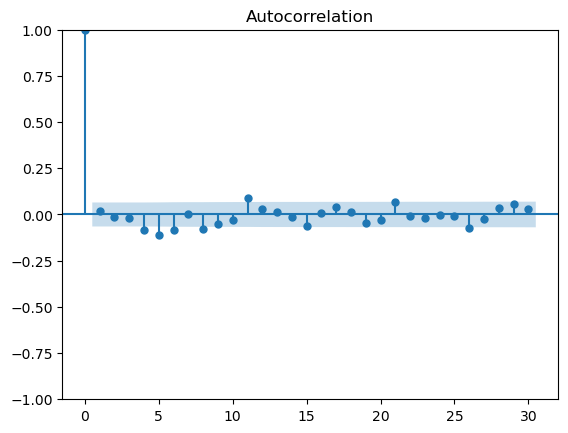

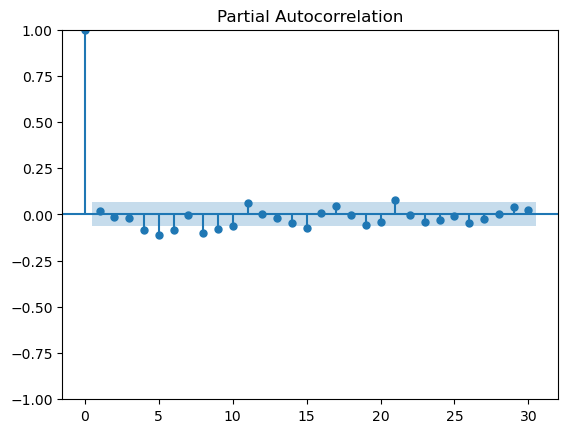

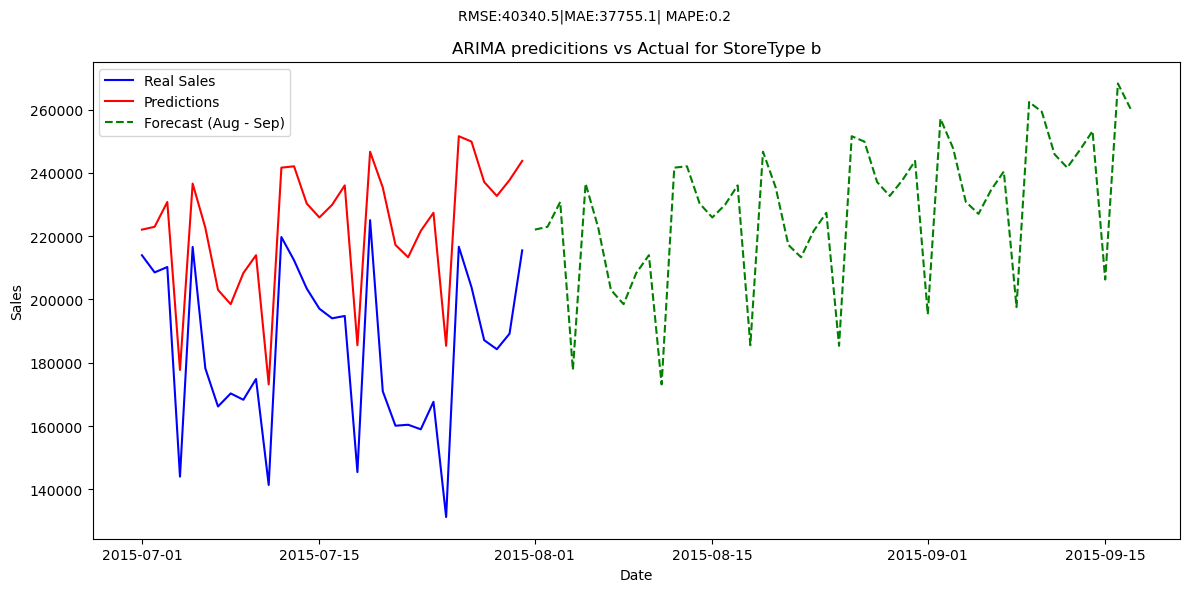

In [84]:
#ARIMA model for Store Types
#StoreType -> B
store_type='b'

#split data in test & train for storetype B
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_b=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_b.fit(train)
print(model_b.summary())

#Predicitions for next month
forecast_b=model_b.predict(n_periods=n_periods)
print(forecast_b)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_b.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_b
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_b.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#ARIMA model for Store Types
#StoreType -> C
store_type='c'

#split data in test & train for storetype C
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_c=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_c.fit(train)
print(model_c.summary())

#Predicitions for next month
forecast_c=model_c.predict(n_periods=n_periods)
print(forecast_c)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_c.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_c
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_c.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#ARIMA model for Store Types
#StoreType -> D
store_type='d'

#split data in test & train for storetype D
train=train_data[train_data['StoreType']==store_type].groupby('Date')['y'].sum()
test=test_data[test_data['StoreType']==store_type].groupby('Date')['y'].sum()
train.index = pd.to_datetime(train.index)
train.sort_index(inplace=True)
test.index = pd.to_datetime(test.index)
test.sort_index(inplace=True)

#ARIMA model
model_d=auto_arima(train,seasonal=True,m=7, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
model_d.fit(train)
print(model_d.summary())

#Predicitions for next month
forecast_d=model_d.predict(n_periods=n_periods)
print(forecast_d)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_c.predict(n_periods=len(future_dates))

#Model fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
y_real=test.values
y_pred=forecast_d
rmse=np.sqrt(mean_squared_error(y_real,y_pred))
mape=mean_absolute_percentage_error(y_real,y_pred)
mae=mean_absolute_error(y_real,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_d.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

# Plot for predictions vs real sales
plt.figure(figsize=(12,6))
plt.plot(test.index,y_real,label='Real Sales',color='blue')
plt.plot(test.index,y_pred,label='Predictions',color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f'ARIMA predicitions vs Actual for StoreType {store_type}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

## ARIMA models for Stores sales forecasting

637
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  727
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 7)   Log Likelihood               -6825.788
Date:                            Wed, 14 May 2025   AIC                          13665.575
Time:                                    12:20:34   BIC                          13697.698
Sample:                                         0   HQIC                         13677.971
                                            - 727                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8774.6137    541.458     16.206      0.000    7713.375    9835.852
ar.L1         -1.1839      0.03

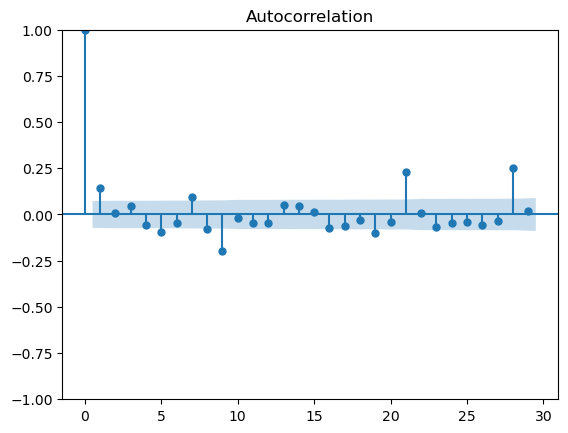

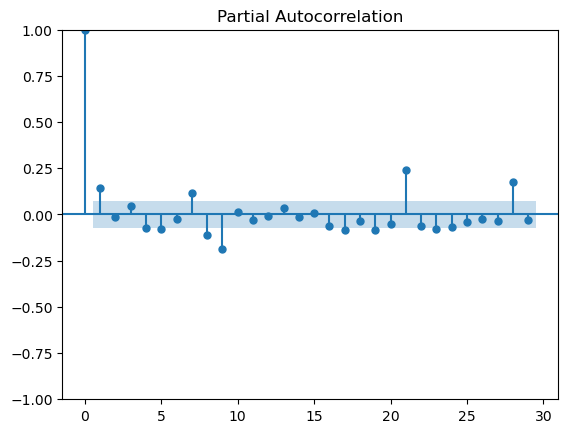

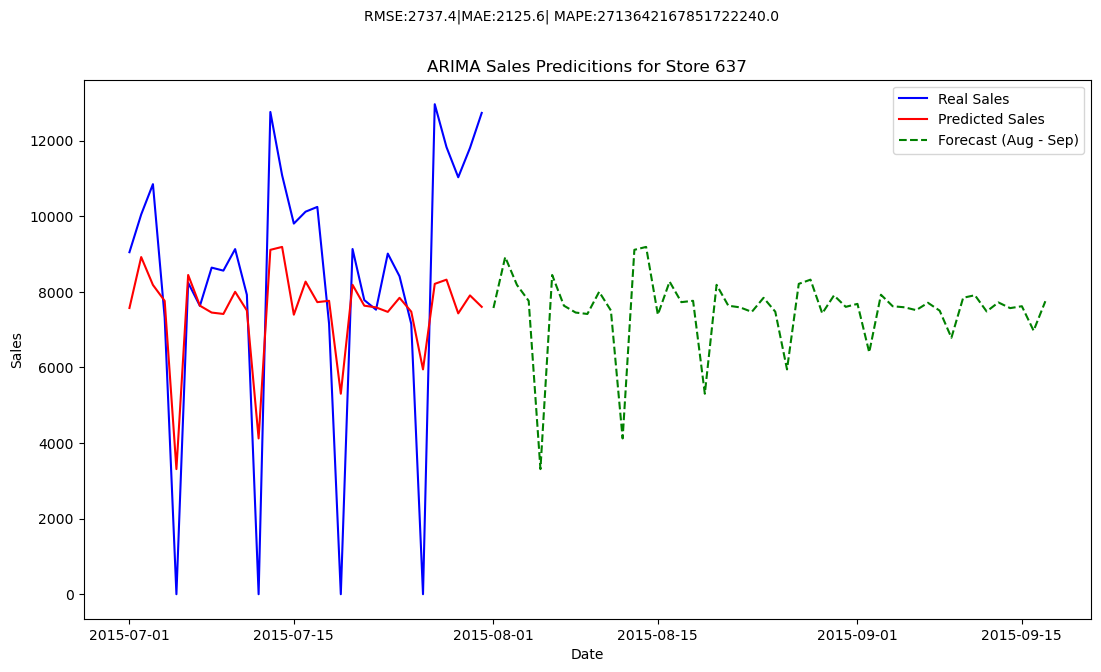

In [85]:
#Arima model for one store at a time
Store_ID=637
#Store_ID=np.random.choice(range(1,data["Store"].max()))   #OR Store_ID=... for a specific store 
print(Store_ID)

#Train & Test data
train_store=train_data[train_data["Store"]==Store_ID].copy()
test_store=test_data[test_data["Store"]==Store_ID].copy()
train_store["Date"]=pd.to_datetime(train_store["Date"])
test_store["Date"]=pd.to_datetime(test_store["Date"])
train_store.set_index("Date",inplace=True)
test_store.set_index("Date",inplace=True)
train_store.sort_index(inplace=True)
test_store.sort_index(inplace=True)

##Arima with seasonality and data for every day
model=auto_arima(train_store["y"],seasonal=True, m=7,trace=False,suppress_warnings=False,stepwise=True)
print(model.summary())

#Predictions
prediction_arima=model.predict(n_periods=n_periods)
#prediction_arima[prediction_arima<0]=0
print(prediction_arima)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01',end='2015-09-17')
forecast_future = model.predict(n_periods=len(future_dates))

#Model Fit with statistics
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],prediction_arima))
mae=mean_absolute_error(test_store["y"],prediction_arima)
mape=mean_absolute_percentage_error(test_store["y"],prediction_arima)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#Plot predictions vs real sales
plt.figure(figsize=(13,7))
plt.plot(test_store.index,test_store["y"],label="Real Sales", color='blue')
plt.plot(test_store.index,prediction_arima,label="Predicted Sales",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"ARIMA Sales Predicitions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

## ARIMA models for store sales forecasting with specific characteristics like PromotionFlags & StoreTypes


In [ ]:
#Arima for Stores with different characteristics (PromotionFlags& StoreTypes)
PROMO_FLAG=1 #0->No & 1->Yes
STORE_TYPE='a'  #a,b,c or d

#Data with the above information
selected_stores=data.copy()
if PROMO_FLAG is not None:
    selected_stores=selected_stores[selected_stores["PromotionFlags"]==PROMO_FLAG]

if STORE_TYPE is not None:
    selected_stores=selected_stores[selected_stores["StoreType"]==STORE_TYPE]

#Random Store
stores=selected_stores["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#test & train data
store_data=data[data["Store"]==Store_ID].copy()
store_data["Date"]=pd.to_datetime(store_data["Date"])
store_data=store_data.sort_values("Date")
store_data.set_index("Date",inplace=True)
split_date='2015-07-01'
train_store=store_data[store_data.index<split_date]
test_store=store_data[store_data.index>=split_date]

#ARIMA model
model_new=auto_arima(train_store["y"],seasonal=True,m=7,trace=False,suppress_warnings=False,stepwise=True)
print(model_new.summary())

#Predictions
pred=model_new.predict(n_periods=n_periods)
#pred[pred<0]=0
print(pred)

#Future Predictions (August & mid-September)
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
forecast_future = model_new.predict(n_periods=len(future_dates))

#Statistics for model fit
#Small AIC & BIC
#Ljung Box Test for Autocorrelation of the resiudals -> P-value<a there is no autocorrelation
#Heteroskedasticity test in the output -> P-value<0.05 problem with heteroskedasticity 
#Jarque Bera for Normality check
#RMSE,MAPE,MAE
rmse=np.sqrt(mean_squared_error(test_store["y"],pred))
mae=mean_absolute_error(test_store["y"],pred)
mape=mean_absolute_percentage_error(test_store["y"],pred)
print(f"RMSE: {rmse:.2f}")
print(f" MAPE: {mape:.2f}")
print(f" MAE: {mae:.2f}")
resid=pd.Series(model_new.resid())
plot_acf(resid)
plot_pacf(resid)
plt.show()

#plot for real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(test_store.index,test_store["y"],label="Actual Sales",color='blue')
plt.plot(test_store.index,pred,label="Predictions",color='red')
plt.plot(future_dates, forecast_future, label='Forecast (Aug - Sep)', color='green', linestyle='--')
plt.title(f"Predictions for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}",fontsize=10)
plt.legend()
plt.show()

## PROPHET

In [86]:
#Dataframe for holidays and date
state_dates=train_data[(train_data.StateHoliday=='a')|(train_data.StateHoliday=='b')|(train_data.StateHoliday=='c')].loc[:,'Date'].values
school_dates=train_data[train_data.SchoolHoliday==1].loc[:,'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays=pd.concat((state,school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


637


12:21:55 - cmdstanpy - INFO - Chain [1] start processing
12:21:55 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
753 2015-07-27 9,678.175   7,558.662  11,622.521
754 2015-07-28 8,540.546   6,527.032  10,588.289
755 2015-07-29 8,362.526   6,396.184  10,185.657
756 2015-07-30 8,721.543   6,854.962  10,671.522
757 2015-07-31 9,175.378   7,295.193  10,931.619
R_squared: 0.76
RMSE: 1760.59
MAPE: 114000423793715664.00
MAE:1325.40


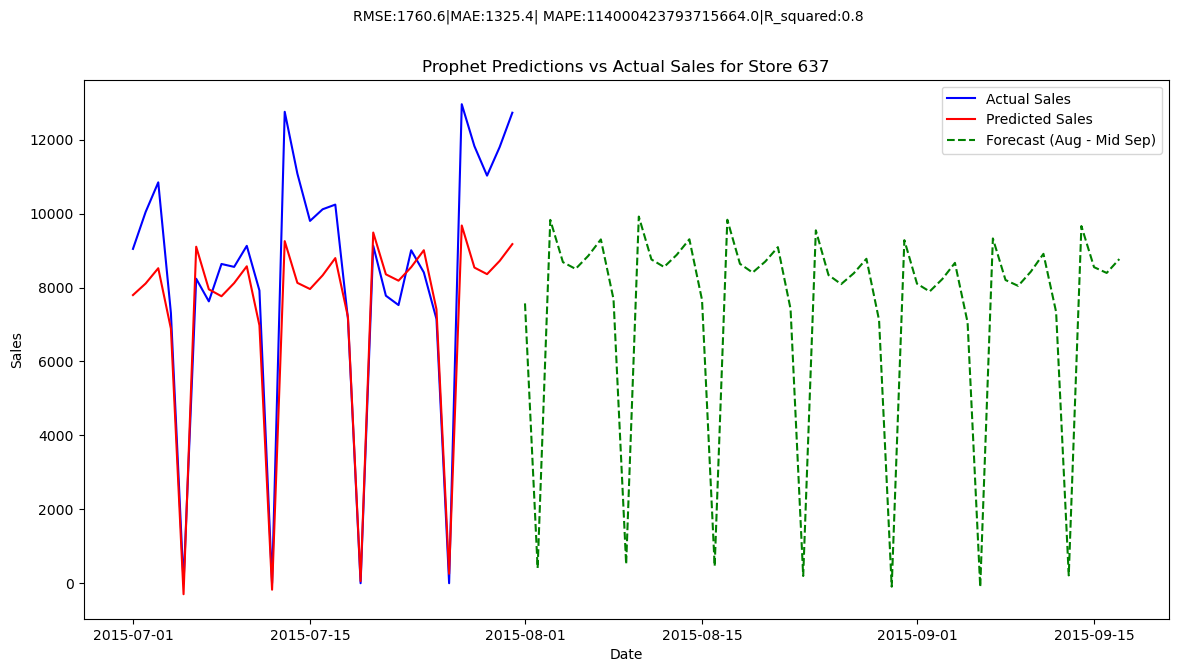

In [87]:
#Prophet model

Store_Id=637
#Random Store
#Store_ID=np.random.choice(range(1,train_data["Store"].max())) #OR Store_ID=... for a specific store
print(Store_ID)

store_data = data[data["Store"] == Store_ID].copy()
store_data['ds'] = pd.to_datetime(store_data['Date'])
store_data['y'] = store_data['y']

# Split store data into train and test based on 'ds'
train_df=store_data[store_data['ds']<split_date].copy()
test_df=store_data[store_data['ds']>= split_date].copy()

##Columns that we will use in the regressors
sel=['ds','y','PromotionFlags']
train_df=train_df[sel]
test_df=test_df[sel]

#Model
m=Prophet(holidays=holidays)
m.add_regressor("PromotionFlags")
#m.add_regressor("CompetitionDistance") #IT RETURNS NEGATIVE PREDICITIONS BECAUSE OF THE OUTLIERS
#m.add_regressor("Customers") #IT RETURNS NEGATIVE PREDICTIONS BECAUSE OF THE OUTLIERS
m.fit(train_df)

#Future dataframe for next 31 days
future=m.make_future_dataframe(periods=31, freq='D')

#Merge with current data
future=future.merge(store_data[['ds','PromotionFlags']],on='ds',how='left')
future['PromotionFlags'].fillna(1, inplace=True)  #With promotion because most stores have promo

#Predictions
forecast=m.predict(future)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail())

# Forecast for Future Dates (Aug - Mid Sep) 
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
future_ext = pd.DataFrame({'ds': future_dates})
future_ext = future_ext.merge(store_data[['ds', 'PromotionFlags']], on='ds', how='left')
future_ext['PromotionFlags'].fillna(1, inplace=True)
#predictions
forecast_future = m.predict(future_ext)


#Model fit with some statistics
merged=pd.merge(test_df[['ds','y']],forecast[['ds','yhat']],on='ds',how='inner')
r2=r2_score(merged['y'],merged['yhat'])
rmse=np.sqrt(mean_squared_error(merged['y'],merged['yhat']))
mape=mean_absolute_percentage_error(merged['y'],merged['yhat'])
mae=mean_absolute_error(merged["y"],merged["yhat"])
print(f"R_squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE:{mae:.2f}")

#Plot real vs predicted values
plt.figure(figsize=(14,7))
plt.plot(merged['ds'],merged['y'],label='Actual Sales',color='blue')
plt.plot(merged['ds'],merged['yhat'],label='Predicted Sales',color='red')
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast (Aug - Mid Sep)', color='green', linestyle='--')
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.show()

In [ ]:
#Prophet model for stores with different characteristics
PROMO_FLAG=1
STORE_TYPE='b'

#Data with the above information
filtered_data=data.copy()
if PROMO_FLAG is not None:
    filtered_data=filtered_data[filtered_data["PromotionFlags"]==PROMO_FLAG]
if STORE_TYPE is not None:
    filtered_data=filtered_data[filtered_data["StoreType"]==STORE_TYPE]

#Random Selection
stores=filtered_data["Store"].unique()
Store_ID=np.random.choice(stores)
print(Store_ID)

#TEST & TRAIN DATA
store_data=data[data["Store"]==Store_ID].copy()
store_data["ds"]=pd.to_datetime(store_data["Date"])
store_data=store_data[["ds","y","PromotionFlags"]].copy()
train_df=store_data[store_data["ds"]<split_date].copy()
test_df=store_data[store_data["ds"]>=split_date].copy()

#Model
m_new=Prophet(holidays=holidays)
m_new.add_regressor("PromotionFlags")
m_new.fit(train_df)

#Future dataframe
future=m_new.make_future_dataframe(periods=31, freq='D')
future=future.merge(store_data[["ds","PromotionFlags"]],on="ds",how="left")
future["PromotionFlags"].fillna(1,inplace=True)  # with promo

#Predicitions
forecast=m_new.predict(future)

# Forecast for Future Dates (Aug - Mid Sep) 
future_dates = pd.date_range(start='2015-08-01', end='2015-09-17')
future_ext = pd.DataFrame({'ds': future_dates})
future_ext = future_ext.merge(store_data[['ds', 'PromotionFlags']], on='ds', how='left')
future_ext['PromotionFlags'].fillna(1, inplace=True)
#predictions
forecast_future = m_new.predict(future_ext)

#Model fit
merged=pd.merge(test_df[["ds", "y"]], forecast[["ds","yhat"]],on="ds",how="inner")
rmse=np.sqrt(mean_squared_error(merged["y"],merged["yhat"]))
mape=mean_absolute_percentage_error(merged["y"],merged["yhat"])
mae= mean_absolute_error(merged["y"],merged["yhat"])
r2=r2_score(merged["y"], merged["yhat"])
print(f"R2:{r2:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"MAPE:{mape:.2%}")
print(f"MAE:{mae:.2f}")

#Plot
plt.figure(figsize=(14,7))
plt.plot(merged["ds"],merged["y"],label="Actual Sales",color="blue")
plt.plot(merged["ds"],merged["yhat"],label="Predicted Sales",color="red")
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast (Aug - Mid Sep)', color='orange', linestyle='--')
plt.title(f"Prophet Predictions vs Actual Sales for Store {Store_ID}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.suptitle(f"RMSE:{rmse:.1f}|MAE:{mae:.1f}| MAPE:{mape:.1f}|R_squared:{r2:.1f}",fontsize=10)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Machine Learning Models -> LightGBM & XGBoost

In [88]:
#Machine Learning models LightGBM & XGBoost
#Libraries
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [89]:
#Preparation for models
target='y'
cols=['y','Date',"StateHoliday","SchoolHoliday","Promo","Promo2"] 
X_train=train_data.drop(columns=cols)
y_train=train_data[target]
X_test=test_data.drop(columns=cols)
y_test=test_data[target]

cat_cols=['StoreType','Assortment','PromoInterval']
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [ ]:
#Hyperparameter tuning 
param_grid= {
    'num_leaves':[5],
    'learning_rate': [0.05,0.1],
    'n_estimators':[50,100],
    'max_depth':[3, 5, 7],
    'min_data_in_leaf':[10,20]
}

#LightGBM Regressor
lgb_regressor=lgb.LGBMRegressor(objective='regression', boosting_type='gbdt')

#Grid search
grid_search=GridSearchCV(
    estimator=lgb_regressor,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  #negative RMSE 
    cv=5
)

#model train
grid_search.fit(X_train, y_train)

#Best hyperparameters
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())
print("Best Hyperparameters:", best_params)
print("Best RMSE Score:", -grid_search.best_score_)  # negative score beacuse it is negative RMSE

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_data_in_leaf': 10, 'n_estimators': 100, 'num_leaves': 5}
Best RMSE Score: 1046.2432721805526


In [90]:
#Model Parameters
par={
    'objective':'regression',
    'metric':'rmse',
    'boosting_type':'gbdt',
    'num_leaves':5,
    'learning_rate':0.1,
    "n_estimators":100,
    'max_depth': 5,
    'min_data_in_leaf':10,
    'verbose':-1,
    "objective":"regression_l2",
}

In [ ]:
#Model with all the variables
model_lgbm=LGBMRegressor(**par)
model_lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

                     Feature  Importance
2                  Customers         176
4                  StoreType          42
6        CompetitionDistance          36
9            Promo2SinceWeek          19
14                       day          19
1                  DayOfWeek          17
5                 Assortment          16
15            PromotionFlags          15
8   CompetitionOpenSinceYear          11
13                     month          11


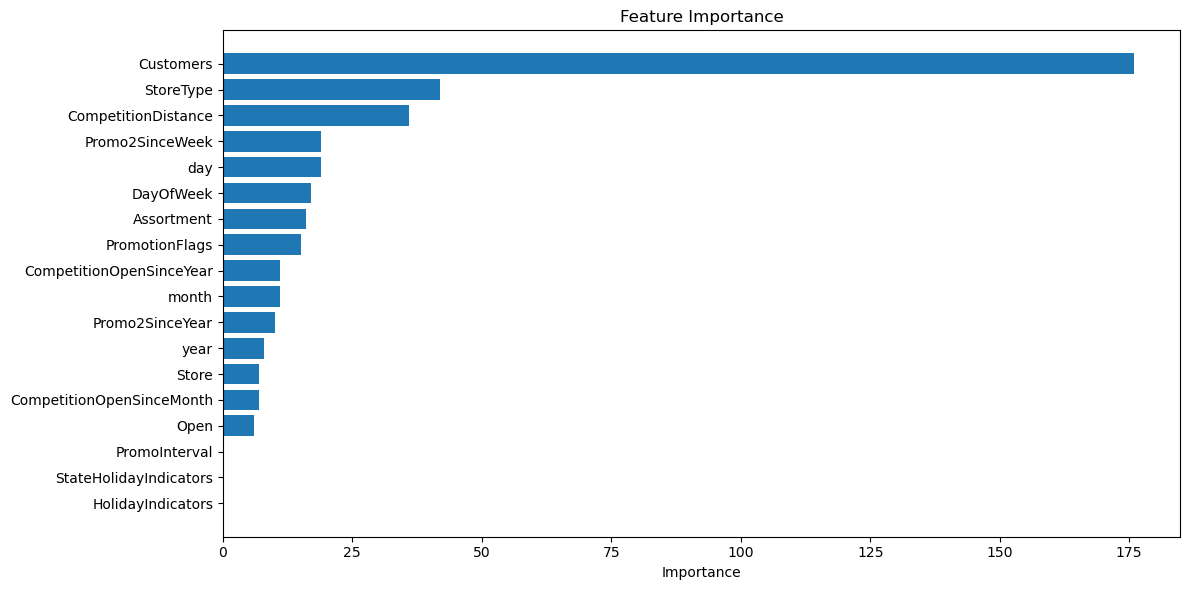

In [92]:
#Feature Importance Plot in order to choose the best variables for the model
var_selection=pd.DataFrame({'Feature':X_train.columns,'Importance':model_lgbm.feature_importances_}).sort_values(by='Importance',ascending=False)
print(var_selection.head(10)) #results

#Plot with the importance of each variable
plt.figure(figsize=(12,6))
plt.barh(var_selection['Feature'][::-1],var_selection['Importance'][::-1])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
#data['Month'] = data['Date'].dt.month
#data['Weekday'] = data['Date'].dt.weekday
#data['DayOfYear'] = data['Date'].dt.dayofyear
#data['IsWeekend'] = data['Date'].dt.weekday >= 5
#data['WeekOfYear'] = data['Date'].dt.isocalendar().week

In [ ]:
#Most important variables from the above plot 
important_features=['Customers','CompetitionDistance','StoreType',"CompetitionOpenSinceYear"]

#New model preparation with important variables
X_train_new=X_train[important_features]
X_test_new=X_test[important_features]

#New model
model_lgbm_new=LGBMRegressor(**par)
model_lgbm_new.fit(X_train_new,y_train,eval_set=[(X_test_new,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

In [ ]:
#Predictions
y_pred=model_lgbm_new.predict(X_test_new)

#Statistics for model fit
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
#r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
#Results
print(f"RMSE:{rmse:.1f}")
print(f"MAE:{mae:.1f}")
print(f"MAPE:{mape:.1f}")
#print(f"R²:{r2:.1f}")
print(f"MSE:{mse:.1f}")

In [ ]:
#CROSS VALIDATION CHECK
cv_scores=cross_val_score(model_lgbm,X_train_new,y_train,cv=5,scoring='neg_root_mean_squared_error')

#RESULTS
print("Cross-Validation RMSE Scores:",-cv_scores)
print("Mean RMSE:",-np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

In [97]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSales']=y_pred

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSales'])),
        'MAE':mean_absolute_error(df['y'],df['PredictedSales']),
        #"MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSales']),
        'R²':r2_score(df['y'],df['PredictedSales'])
    })
).reset_index()
print(store_results)

      Store      RMSE       MAE    R²
0         1   423.273   326.621 0.933
1         2 1,161.103   627.328 0.662
2         3   600.552   442.288 0.952
3         4   710.137   503.793 0.964
4         5   532.794   439.518 0.933
...     ...       ...       ...   ...
1110   1111 1,216.960   893.301 0.649
1111   1112 2,658.100 2,160.291 0.438
1112   1113   584.556   463.504 0.946
1113   1114 2,638.983 1,997.162 0.896
1114   1115 1,790.905 1,549.723 0.559

[1115 rows x 4 columns]


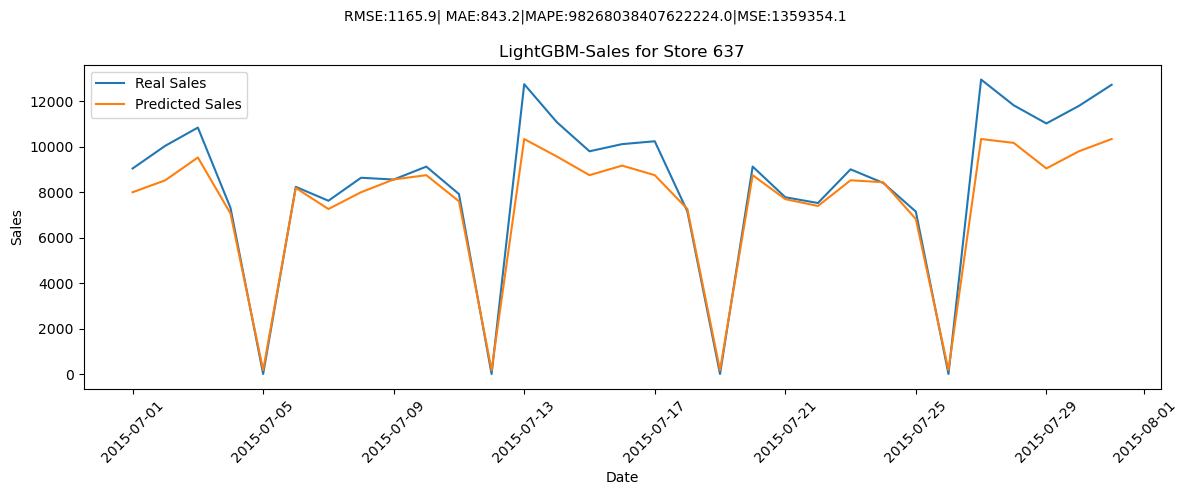

In [98]:
#Predictions for a specific store
store_ID=637
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSales']))
mae_store=mean_absolute_error(store_df['y'],store_df['PredictedSales'])
#r2_store=r2_score(store_df['y'],store_df['PredictedSales'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSales'])
mse=mean_squared_error(store_df['y'],store_df['PredictedSales'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSales'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'LightGBM-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.1f}| MAE:{mae_store:.1f}|MAPE:{mape:.1f}|MSE:{mse:.1f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#MAPE without outliers
#def calculate_mape(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    #non_zero = y_true != 0
    #return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

#print(calculate_mape(store_df['y'],store_df['PredictedSales']))

In [44]:
#Split Store IDs in 3 parts becasuse python can't run
store_ids=test_data['Store'].unique()
n=len(store_ids)
one_third=n//3
two_third=2*(n//3)
first_part=store_ids[:one_third]
second_part=store_ids[one_third:two_third]
third_part=store_ids[two_third:]

In [ ]:
#Plots with predictions for all the stores in first part
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSales']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSales'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSales'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSales'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSales'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f} | MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in second part
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSales']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSales'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSales'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSales'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSales'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in third part
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSales']))
    mae_store=mean_absolute_error(store_data['y'],store_data['PredictedSales'])
    r2_store=r2_score(store_data['y'],store_data['PredictedSales'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSales'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSales'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Model with standarized features beacause of the outliers
#scaler=StandardScaler()
#dummy variables
#X_train_dummies=pd.get_dummies(X_train,drop_first=True)
#X_test_dummies=pd.get_dummies(X_test,drop_first=True)
#Merge with data
#X_train_dummies,X_test_dummies=X_train_dummies.align(X_test_dummies,fill_value=0,axis=1)
#X_train_scaled=scaler.fit_transform(X_train_dummies)
#X_test_scaled=scaler.transform(X_test_dummies)

#As dataframe
#X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train_dummies.columns)
#X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test_dummies.columns)
#Some columns have True or False in dummy variables
#print(X_train_dummies.dtypes.value_counts())
#print(X_test_dummies.dtypes.value_counts())

#bool_columns=X_train_dummies.select_dtypes(include=['bool']).columns
#print(bool_columns)
#bool_columns1=X_test_dummies.select_dtypes(include=['bool']).columns
#print(bool_columns1)

#Convert bool as int
#X_train_dummies[bool_columns]=X_train_dummies[bool_columns].astype(int)
#X_test_dummies[bool_columns]=X_test_dummies[bool_columns].astype(int)
#print(X_train_dummies.dtypes.value_counts())#check
#print(X_test_dummies.dtypes.value_counts())#check

#model with scaling
#model_lgbms=LGBMRegressor(**par)
#model_lgbms.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric="rmse",callbacks=[early_stopping(stopping_rounds=50),log_evaluation(period=100)])

##PROBLEM WITH FEATURE NAMESS###

In [62]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size].copy(deep=True)
test_data = data[train_size:].copy(deep=True)

In [63]:
def prepare_df_ml(data):
    new_df = data.copy(deep=True)
    
    # Ελέγξτε αν η στήλη Date υπάρχει και κάντε τη σε datetime αν χρειάζεται
    if 'Date' in new_df.columns:
        new_df['Date'] = pd.to_datetime(new_df['Date'])
        new_df.set_index('Date', inplace=True)  # Βάζουμε τη στήλη 'Date' ως index
    else:
        raise ValueError("Στήλη 'Date' δεν βρέθηκε στα δεδομένα.")
    
    # Αφαιρούμε τις στήλες που δεν χρειάζονται
    new_df.drop(["Store", "StateHoliday"], inplace=True, axis=1)
    
    # Μετατροπή στις κατηγορικές στήλες σε 'category'
    categorical_columns = ['StoreType', 'Assortment', 'PromoInterval']
    for col in categorical_columns:
        if col in new_df.columns:
            new_df[col] = new_df[col].astype('category')
    
    # Δημιουργία νέων στηλών από την index που είναι datetime
    new_df['Day'] = new_df.index.day.astype(int)
    new_df['Month'] = new_df.index.month.astype(int)
    new_df['Year'] = new_df.index.year.astype(int)
    new_df['DayOfYear'] = new_df.index.dayofyear.astype(int)
    new_df['WeekOfYear'] = new_df.index.isocalendar().week.astype(int)
    
    # Διαχωρισμός X και Y για το μοντέλο
    df_prep_X = new_df.drop("Sales", axis=1)
    df_prep_Y = new_df["Sales"]
    
    return df_prep_X, df_prep_Y

# Παράδειγμα χρήσης της συνάρτησης
train_prep_X, train_prep_Y = prepare_df_ml(train_data)


In [64]:
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(train_prep_X, train_prep_Y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 813767, number of used features: 22
[LightGBM] [Info] Start training from score 5844.628869


LGBMRegressor(random_state=42)

In [65]:
lgbm_train_preds = lgbm_model.predict(train_prep_X)
lgbm_train_preds = pd.Series(lgbm_train_preds, index= train_prep_X.index)
lgbm_train_preds = lgbm_train_preds.clip(lower=0)
lgbm_train_preds[train_prep_X["Open"] == 0] = 0
#print(f'RMSPE for LGBM on Train:{np.sqrt(mean_squarred_error(lgbm_train_preds,train_prep_Y))'}

In [66]:
test_prep_X, test_prep_Y = prepare_df_ml(test_data)
lgbm_preds = lgbm_model.predict(test_prep_X)
lgbm_test_preds = lgbm_model.predict(test_prep_X)
lgbm_test_preds = pd.Series(lgbm_test_preds, index= test_prep_X.index)
lgbm_test_preds = lgbm_test_preds.clip(lower=0)
lgbm_test_preds[test_prep_X["Open"] == 0] = 0
#print(f'RMSPE for LGBM on Test:{rmspe(lgbm_test_preds,test_prep_Y)}')

In [ ]:
lgbm = LGBMRegressor(**par, random_state=42)
#Sort the values to use the last days as a validation set
temp = train_df.sort_values(["Year","Month","Day"], ignore_index=True).copy()

#The same time period as the test set
train = temp[:-47000].copy()       
vali = temp[-47000:].copy()

#Return to the same order as the original dataset
train.sort_values(["Store"], ignore_index=True, inplace=True)
vali.sort_values(["Store"], ignore_index=True, inplace=True)
train.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)
vali.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)

#Get the target
y_test = vali['Sales'].copy()
vali.drop('Sales',inplace=True,axis=1)

#Fit the Model
lgbm.fit(train.drop('Sales',axis=1),train['Sales'])
y_pred = lgbm.predict(vali)

#Use a Correction Factor Because we transformed the target with log(x+1) then reversed it
y_pred = y_pred*0.995
score = RMSPE(y_test,y_pred)
score

plotImp(lgbm,train.drop('Sales',axis=1))

X = train_df.drop('Sales',axis=1)
y = train_df['Sales']

X_MaySept = train_df[(train_df['Month'] >= 5) & (train_df['Month'] <= 9)]
X_MaySept.reset_index(drop=True)
y_MaySept = X_MaySept['Sales']
X_MaySept = X_MaySept.drop('Sales',axis=1)

Predictions = pd.DataFrame()
for seed in range(30,46):
    lgbm = LGBMRegressor(**params, random_state=seed)
    #Transform the target with log(x+1) to make the model able to optimize the loss function properly
    llgbm = TransformedTargetRegressor(lgbm, func = np.log1p, inverse_func = np.expm1)
    llgbm.fit(X, y)

    Predictions[f'Sales_{seed}'] = llgbm.predict(test_df)
    Predictions[f'Sales_{seed}'] = Predictions[f'Sales_{seed}'] * 0.995 #Multiply by a Correction Factor

Predictions['Mean'] = Predictions.mean(axis=1)
Predictions['HMean'] = Predictions.apply(stats.hmean, axis=1)
Predictions['GMean'] = Predictions.apply(stats.gmean, axis=1)

for seed in range(30,46):
    lgbm = LGBMRegressor(**params, random_state=seed)
    #Transform the target with log(x+1) to make the model able to optimize the loss function properly
    llgbm = TransformedTargetRegressor(lgbm, func = np.log1p, inverse_func = np.expm1)
    llgbm.fit(X_MaySept, y_MaySept)

    Predictions[f'Sales_2_{seed}'] = llgbm.predict(test_df)
    Predictions[f'Sales_2_{seed}'] = Predictions[f'Sales_2_{seed}'] * 0.995

Predictions['Mean_2'] = Predictions.mean(axis=1)
Predictions['HMean_2'] = Predictions.apply(stats.hmean, axis=1)
Predictions['GMean_2'] = Predictions.apply(stats.gmean, axis=1)

FinalPred = Predictions[['Mean','HMean','GMean','Mean_2','HMean_2','GMean_2']].apply(stats.hmean,axis=1)

In [ ]:
fig ,axes =plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(16)

axes[0].plot(train_data["Sales"], label='Train',color='blue')
axes[0].plot(test_data["Sales"], label='Test',color='orange')

axes[0].plot(lgbm_test_preds,label="LGBM",color='red')
axes[0].legend(loc='best')

axes[1].plot(test_data["Sales"], label='Test',color='orange')
axes[1].plot(lgbm_test_preds,label="LGBM",color='red')
axes[1].legend(loc='best')
plt.show()

## XGBoost model

In [ ]:
#XGBoost model
categorical_columns=['StoreType','Assortment','PromoInterval',"DayOfWeek","Open","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","PromoInterval","Promo2SinceWeek","Promo2SinceYear"] 
for col in categorical_columns:
   X_train[col]=X_train[col].astype('category')
   X_test[col]=X_test[col].astype('category')

#Hyperparameter tuning
param_grid={
    'max_depth':[3,5],
    'learning_rate':[0.01,0.1,0.3],
    'n_estimators':[100,300,500]
}

#XGBoost Regressor
xgb=XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42,enable_categorical=True)

#Grid Search
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=3,n_jobs=-1,verbose=2)

#Model Train
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE Score: {-grid_search.best_score_}")

In [ ]:
#XGBoost model with all the variables
categorical_columns=['StoreType','Assortment','PromoInterval',"DayOfWeek","Open","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","PromoInterval","Promo2SinceWeek","Promo2SinceYear"] 
for col in categorical_columns:
   X_train[col]=X_train[col].astype('category')
   X_test[col]=X_test[col].astype('category')

#model with best parameters
xgb_model=XGBRegressor(objective='reg:squarederror',learning_rate=0.3,max_depth=5,n_estimators=500,verbosity=1,enable_categorical=True)
xgb_model.fit(X_train,y_train)

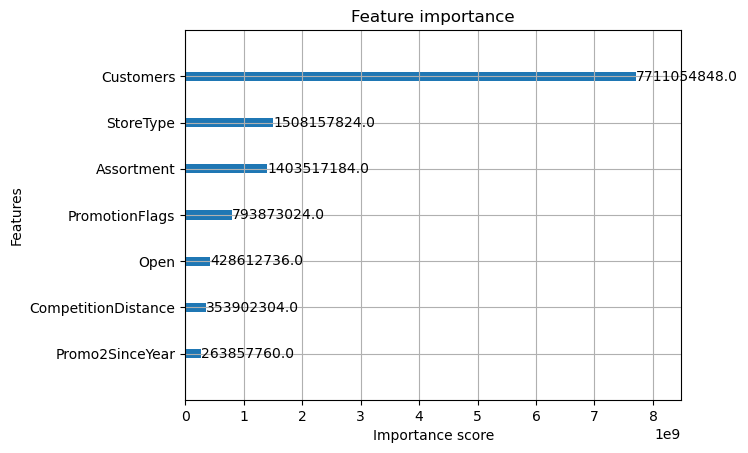

In [100]:
#Variables selection
plot_importance(xgb_model,importance_type='gain',max_num_features=7)
plt.show()

In [101]:
#important features from feature importance plot
selected_features=['Customers','Assortment','StoreType',"PromotionFlags"]
X_train_new=X_train[selected_features]
X_test_new=X_test[selected_features]

In [102]:
#new model with important features
xgb_model=XGBRegressor(objective='reg:squarederror',learning_rate=0.05,verbosity=1,enable_categorical=True)
xgb_model.fit(X_train_new,y_train)

#predictions
y_predict=xgb_model.predict(X_test_new)

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
r2=r2_score(y_test,y_predict)
mape=mean_absolute_percentage_error(y_test,y_predict)
#results
print(f"RMSE:{rmse:.1f}")
print(f"R2:{r2:.1f}")
print(f"MAPE:{mape:.1f}")

RMSE:1212.9
R2:0.9
MAPE:34940740094439228.0


In [ ]:
#CROSS VALIDATION
cv_scores=cross_val_score(xgb_model, X_train_new, y_train,cv=5,scoring='neg_root_mean_squared_error')
#Results
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:",np.std(-cv_scores))

In [105]:
#Statistics for every model predicitions per store ID
test_data=test_data.copy() 
test_data['PredictedSalesXG']=y_predict

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXG'])),
        'R²':r2_score(df['y'],df['PredictedSalesXG']),
       # "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXG'])
    })
).reset_index()
print(store_results)

      Store      RMSE    R²
0         1   247.362 0.977
1         2 1,371.946 0.528
2         3   851.518 0.903
3         4   726.385 0.962
4         5   376.421 0.967
...     ...       ...   ...
1110   1111 1,251.825 0.629
1111   1112 2,516.272 0.496
1112   1113   729.226 0.916
1113   1114 1,723.782 0.956
1114   1115 1,552.928 0.668

[1115 rows x 3 columns]


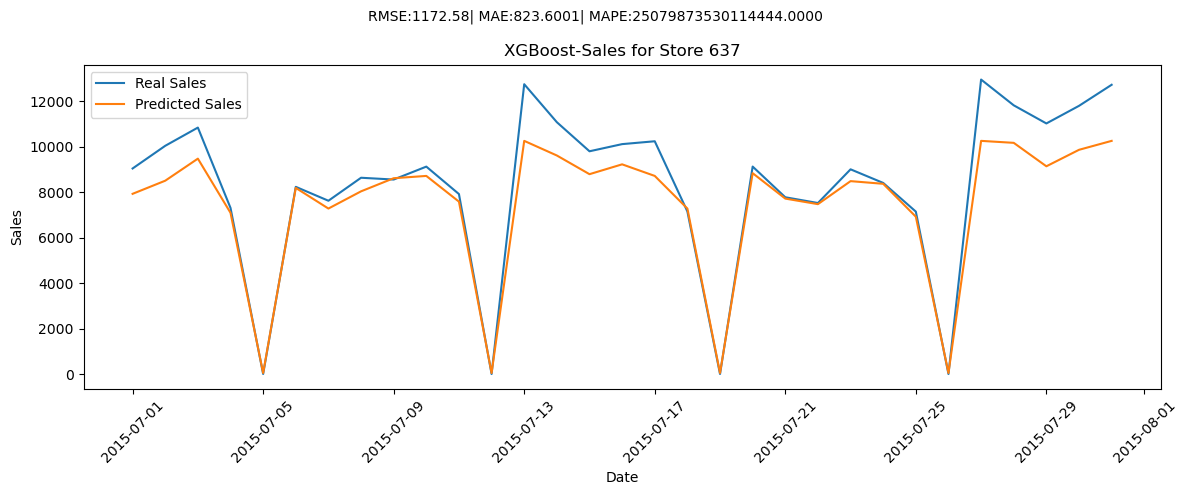

In [106]:
#Predictions for a specific store
store_ID=637
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXG']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXG'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXG'])
mae=mean_absolute_error(store_df["y"],store_df["PredictedSalesXG"])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXG'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'XGBoost-Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| MAE:{mae:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Plots with predictions for all the stores in first part
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in second part
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in third part
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXG']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXG'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXG'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXG'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#second model with some important variables
sel_features=['Customers','CompetitionDistance','HolidayIndicators','PromotionFlags','StoreType',"Assortment"]
X_train_neww=X_train[sel_features]
X_test_neww=X_test[sel_features]

#second model
xgb_model_second=XGBRegressor(objective='reg:squarederror',learning_rate=0.05,verbosity=1,enable_categorical=True)
xgb_model_second.fit(X_train_neww,y_train)

#predictions
y_p=xgb_model_second.predict(X_test_neww)

#model performance
rmse=np.sqrt(mean_squared_error(y_test,y_p))
r2=r2_score(y_test,y_p)
mape=mean_absolute_percentage_error(y_test,y_p)
#results
print(f"MAPE:{mape:.4f}")
print(f"RMSE:{rmse:.4f}")
print(f"R2:{r2:.4f}")

In [ ]:
#Statistics for every model predicitions per store ID with new model
test_data=test_data.copy() 
test_data['PredictedSalesXGBOOST']=y_p

store_results = test_data.groupby('Store').apply(
    lambda df: pd.Series({
        'RMSE':np.sqrt(mean_squared_error(df['y'],df['PredictedSalesXGBOOST'])),
        'R²':r2_score(df['y'],df['PredictedSalesXGBOOST']),
        "MAPE":mean_absolute_percentage_error(df['y'],df['PredictedSalesXGBOOST'])
    })
).reset_index()
print(store_results)

In [ ]:
#Predictions for a specific store with new model
store_ID=165
store_df=test_data[test_data['Store']==store_ID]
store_df['Date']=pd.to_datetime(store_df['Date'])
store_df=store_df.sort_values(by='Date')

#Statistics
rmse_store=np.sqrt(mean_squared_error(store_df['y'],store_df['PredictedSalesXGBOOST']))
r2_store=r2_score(store_df['y'],store_df['PredictedSalesXGBOOST'])
mape=mean_absolute_percentage_error(store_df['y'],store_df['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
plt.figure(figsize=(12,5))
plt.plot(store_df['Date'],store_df['y'],label='Real Sales')
plt.plot(store_df['Date'],store_df['PredictedSalesXGBOOST'],label='Predicted Sales')
plt.title(f'Sales Predicitions for Store {store_ID}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.title(f'Sales for Store {store_ID}')
plt.suptitle(f"RMSE:{rmse_store:.2f}| R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Plots with predictions for all the stores in first part with new model
#For loop for all the stores
for store_id in first_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in second part with new model
#For loop for all the stores
for store_id in second_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
    mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#Plots with predictions for all the stores in third part with new model
#For loop for all the stores
for store_id in third_part:
    store_data=test_data[test_data['Store']==store_id]
    store_data['Date']=pd.to_datetime(store_data['Date'])
    store_data=store_data.sort_values(by='Date')

#Statistics
    rmse_store=np.sqrt(mean_squared_error(store_data['y'],store_data['PredictedSalesXGBOOST']))
    r2_store=r2_score(store_data['y'],store_data['PredictedSalesXGBOOST'])
     mape=mean_absolute_percentage_error(store_data['y'],store_data['PredictedSalesXGBOOST'])

#Plot for predictions vs real values
    plt.figure(figsize=(12,5))
    plt.plot(store_data['Date'],store_data['y'],label='Real Sales')
    plt.plot(store_data['Date'],store_data['PredictedSalesXGBOOST'],label='Predicted Sales')
    plt.title(f'Sales Predicitions for Store {store_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.title(f'Sales for Store {store_id}')
    plt.suptitle(f"RMSE:{rmse_store:.2f}|R²:{r2_store:.4f}| MAPE:{mape:.4f}",fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Features που επέλεξες
features = ["PromotionFlags", "CompetitionDistance", "Customers", "HolidayIndicators"]

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])
X_future_scaled = scaler.transform(X_future[features])

print("Data prepared for training.")

# Αρχικοποίηση του XGBoost Model
model_xgb = xgb.XGBRegressor(
    max_depth=8,
    n_estimators=500,
    learning_rate=0.05,
    reg_alpha=0.1,   # L1 Regularization
    reg_lambda=0.1,  # L2 Regularization
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

# Εκπαίδευση
model_xgb.fit(X_train_scaled, y_train)

print("Model training completed.")

# Προβλέψεις για τον Ιούλιο (Validation Set)
val_predictions = model_xgb.predict(X_val_scaled)

# Προβλέψεις για τον Αύγουστο και μέχρι 17 Σεπτεμβρίου (Future Set)
future_predictions = model_xgb.predict(X_future_scaled)

# Διαχείριση ακραίων τιμών
threshold = y_train.quantile(0.95)  # 95ο εκατοστημόριο από το train set
val_predictions[val_predictions < 0] = 0
val_predictions[val_predictions > threshold] = threshold
future_predictions[future_predictions < 0] = 0
future_predictions[future_predictions > threshold] = threshold

print("Predictions completed.")

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
mae = mean_absolute_error(y_val, val_predictions)
mape = mean_absolute_percentage_error(y_val, val_predictions)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2%}")
import matplotlib.pyplot as plt

# Validation Set Plot
plt.figure(figsize=(12, 6))
plt.plot(validation_set['Date'], y_val, label="Actual Sales (Validation)", color='blue')
plt.plot(validation_set['Date'], val_predictions, label="Predicted Sales (Validation)", color='red')
plt.title("XGBoost Predictions vs Actual Sales (Validation Set)")
plt.legend()
plt.show()

# Future Set Plot
plt.figure(figsize=(12, 6))
plt.plot(future_set['Date'], future_predictions, label="Future Forecast (Aug - Mid Sep)", color='green', linestyle='--')
plt.title("XGBoost Forecast for August - Mid September")
plt.legend()
plt.show()



### PCA #not needed

In [ ]:
#PCA  
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [ ]:
#Dummy variables for categorical data
#data = pd.get_dummies(data, columns=['StoreType'], prefix='StoreType')
#data = pd.get_dummies(data, columns=['Assortment'], prefix='Assortment')
#data = pd.get_dummies(data, columns=['PromoInterval'], prefix='PromoInterval') 

In [ ]:
#data.columns

In [ ]:
#We have T or F so i change the type in order to get 0 or 1 values
#data["Assortment_a"] = data["Assortment_a"].astype(int)
#data["Assortment_b"] = data["Assortment_b"].astype(int)
#data["Assortment_c"] = data["Assortment_c"].astype(int)

#data["PromoInterval_Feb,May,Aug,Nov"] = data["PromoInterval_Feb,May,Aug,Nov"].astype(int)
#data["PromoInterval_Jan,Apr,Jul,Oct"] = data["PromoInterval_Jan,Apr,Jul,Oct"].astype(int)
#data["PromoInterval_Mar,Jun,Sept,Dec"] = data["PromoInterval_Mar,Jun,Sept,Dec"].astype(int)

#data["StoreType_a"] = data["StoreType_a"].astype(int)
#data["StoreType_b"] = data["StoreType_b"].astype(int)
#data["StoreType_c"] = data["StoreType_c"].astype(int)
#data["StoreType_d"] = data["StoreType_d"].astype(int)

In [ ]:
#data.head(1) #check

In [ ]:
#data.columns

In [ ]:
#features=['DayOfWeek', 'Customers', 'Open', 'CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','PromotionFlags', 'HolidayIndicators',
#'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b', 'Assortment_c','PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
#'PromoInterval_Mar,Jun,Sept,Dec']

#X=data[features]
#y=data['Sales']

#scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)

#pca=PCA(n_components=5)
#X_pca=pca.fit_transform(X_scaled)

#print(pca.explained_variance_ratio_)

In [ ]:
#pca_results=pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)],index=X.columns)
#pca_results = pca_results.round(3)
#print(pca_results)